# Problem 1: Exit Poll

## Problem Statement:
You are hired by one of the leading news channel CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

## Importing the required packages

In [1]:
# Numerical libraries
import numpy as np   

# To handle data in form of rows and columns 
import pandas as pd    

# Importing ploting libraries
import matplotlib.pyplot as plt 

# Importing seaborn for statistical plots
import seaborn as sns

# Importing numpy for list and series operations
import numpy as np

# Importing Standard Scalar to scale the data
from sklearn.preprocessing import StandardScaler

# To split the data into train and test sets
from sklearn.model_selection import train_test_split

# Importing Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Importing LDA Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Importing KNN Model
from sklearn.neighbors import KNeighborsClassifier

# Importing Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

# Importing Adaptive Boost
from sklearn.ensemble import AdaBoostClassifier

# Importing Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

# Importing Bagging
from sklearn.ensemble import BaggingClassifier

# Importing Random Forest
from sklearn.ensemble import RandomForestClassifier

# Importing the smote over sampling package
from imblearn.over_sampling import SMOTE

# To split the data into train test and split
from sklearn.model_selection import train_test_split,GridSearchCV

# Model performance parameters
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Importing the data

In [2]:
# Loading the entire workbook
xls = pd.ExcelFile('Election_Data.xlsx')

In [3]:
# Listing the sheet names
xls.sheet_names

['Sheet1', 'Election_Dataset_Two Classes']

In [4]:
# To read the data from the sheet named "Election_Dataset_Two Classes"
df_election = pd.read_excel(xls, sheet_name="Election_Dataset_Two Classes")
df_election

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...,...
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male


## Exploratory Data Analysis

In [5]:
# Checking the shape of the imported data
print('The number of variables in the data set: {}\nThe number of samples in the data set: {}'.format(df_election.shape[0], df_election.shape[1]))

The number of variables in the data set: 1525
The number of samples in the data set: 10


In [6]:
# Checking the first 10 entries in the data
df_election.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [7]:
# Obtaining the list of the columns in the data set
print('The columns in the data set are:')
[print('%d. %s'%(ind+1, i)) for ind, i in enumerate(df_election.columns)]

The columns in the data set are:
1. Unnamed: 0
2. vote
3. age
4. economic.cond.national
5. economic.cond.household
6. Blair
7. Hague
8. Europe
9. political.knowledge
10. gender


[None, None, None, None, None, None, None, None, None, None]

It is observed that the **Unnamed: 0** column is a column having serial numbers. This column will not prove to be usefulfor analysis and hence we can drop it.

In [8]:
# Droping the Unnamed: 0 column
df_election.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [9]:
# Checking for multiple rows with the same entry (duplicate/redundant entries)
df_election[df_election.duplicated()]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [10]:
# Info of the data
df_election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


For ease of use and aesthetics we will remove the '.' and replace with '_' from the column names and also convert all the column names to lower case

In [11]:
# Converting the column names to lower case
df_election.columns = [x.lower() for x in df_election.columns]
# Replacing the '.' with '_'
df_election.columns = [x.replace('.','_') for x in df_election.columns]
df_election

,vote,age,economic_cond_national,economic_cond_household,blair,hague,europe,political_knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


In [12]:
# Converting all the columns except 'age' to object type as it will make it easy for initial analysis
for i in df_election.columns:
    if i != 'age':
        df_election[i] = df_election[i].astype(object)

In [13]:
# Checking the change in data type
df_election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic_cond_national   1525 non-null   object
 3   economic_cond_household  1525 non-null   object
 4   blair                    1525 non-null   object
 5   hague                    1525 non-null   object
 6   europe                   1525 non-null   object
 7   political_knowledge      1525 non-null   object
 8   gender                   1525 non-null   object
dtypes: int64(1), object(8)
memory usage: 107.4+ KB


In [14]:
# Making a list for continuous and categorical columns
cont = []
cat = []
for i in df_election.columns:
    if df_election[i].dtypes != 'O':
        cont.append(i)
    else:
        cat.append(i)

In [15]:
# Five number summary of continuous variables
df_election[cont].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0


In [16]:
# Five four summary of continuous variables
df_election[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
economic_cond_national,1525,5,3,607
economic_cond_household,1525,5,3,648
blair,1525,5,4,836
hague,1525,5,2,624
europe,1525,11,11,338
political_knowledge,1525,4,2,782
gender,1525,2,female,812


-	vote and gender are object data types and categorical in nature (nominal scale)
-	age is integer data type and continuous in nature (ratio scale)
-	all other columns are integer data types and categorical in nature (by data definition it can be assumed to be ordinate scaled)
-	There are no missing values as all the columns have 1525 non null values. The age variable does not have any special character in it. However all the variables must be checked if they have any undesirable/unrealistic values.
-	The range of age is meaningful and the possibility of having undesirable/unrealistic values is ruled out
-	The classes of categorical variables will be checked in univariate analysis
-	age is almost normally distributed
-	vote and gender can be converted into a binary variable as they have only 2 classes
-	europe has 11 classes and the mode class has 338 entries
-	All the other categorical columns have 4-5 classes and the class distribution is quite uneven as the model class by itself has almost 40% to 56% of the entire data entry

**The vote variable is the target variable**

----------

### Univariate Analysis

In [17]:
# User defined function to get upper and lower whisker values for each column
def remove_outlier(col):
    col = col.dropna()
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

Text(0.5, 1.0, 'Box Plot of the entire data')

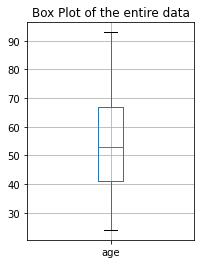

In [18]:
# Plotting the box plot for the data
plt.figure(figsize=(3,4))
df_election.boxplot()
plt.title('Box Plot of the entire data')


Variable: age


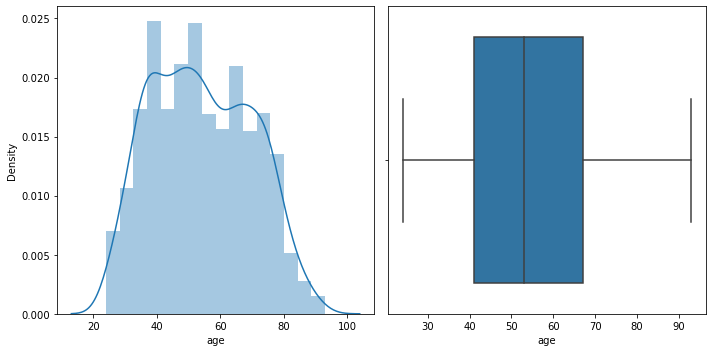

age is Positive or Right skewed.
The number of outliers in age is 0

---------------------------------------------------------------------------------------


In [19]:
# Univariate analysis for continuous variables that plots the distribution plot, barplot, skewness and the number of outliers
data = df_election[cont].copy()
for i in data:
    print('\nVariable: \033[1m'+i+'\033[1m')
    fig, axes = plt.subplots(ncols=2)
    fig.set_size_inches(10,5)
    sns.distplot(data[i] , ax=axes[:][0], label=i)
    sns.boxplot(data[i] , orient = "v" , ax=axes[:][1])
    plt.tight_layout()
    plt.show()
    skew = data[i].skew()
    if(skew > 0):
        print('%s is Positive or Right skewed.' %(i))
    elif(skew < 0):
        print('%s is Negative or Left skewed.' %(i))
    else:
        print('%s is not skewed.' %(i))
    lratio,uratio=remove_outlier(data[i])
    print('The number of outliers in %s is %d\n'% (i,((data[i]>uratio) | (data[i]<lratio)).sum()))
    print('---------------------------------------------------------------------------------------')


Variable: vote

The number of unique entries in the column vote : 2

The entry with the highest frequency in vote : Labour



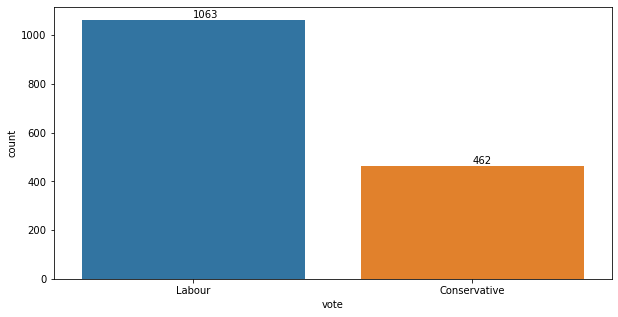

Percentage share:

Labour          69.704918
Conservative    30.295082
Name: vote, dtype: float64
---------------------------------------------------------------------------------------

Variable: economic_cond_national

The number of unique entries in the column economic_cond_national : 5

The entry with the highest frequency in economic_cond_national : 3



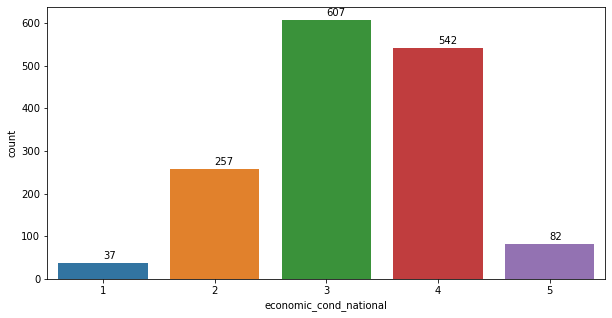

Percentage share:

3    39.803279
4    35.540984
2    16.852459
5     5.377049
1     2.426230
Name: economic_cond_national, dtype: float64
---------------------------------------------------------------------------------------

Variable: economic_cond_household

The number of unique entries in the column economic_cond_household : 5

The entry with the highest frequency in economic_cond_household : 3



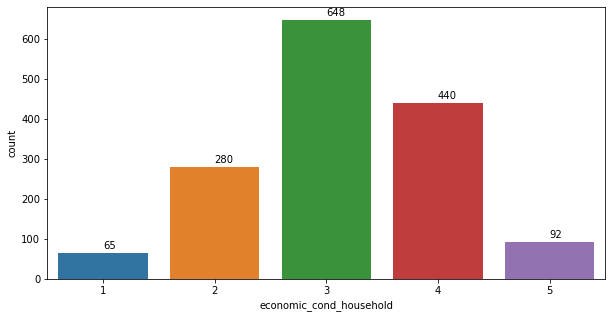

Percentage share:

3    42.491803
4    28.852459
2    18.360656
5     6.032787
1     4.262295
Name: economic_cond_household, dtype: float64
---------------------------------------------------------------------------------------

Variable: blair

The number of unique entries in the column blair : 5

The entry with the highest frequency in blair : 4



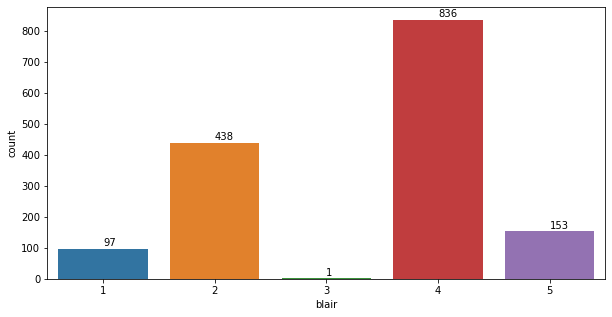

Percentage share:

4    54.819672
2    28.721311
5    10.032787
1     6.360656
3     0.065574
Name: blair, dtype: float64
---------------------------------------------------------------------------------------

Variable: hague

The number of unique entries in the column hague : 5

The entry with the highest frequency in hague : 2



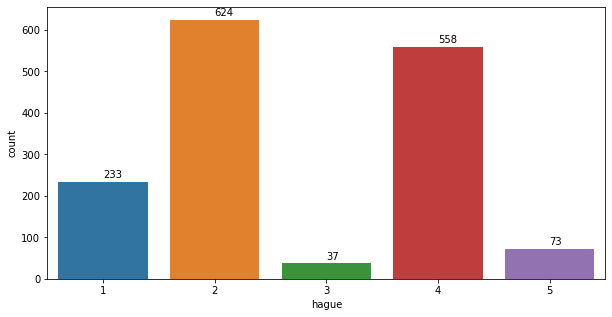

Percentage share:

2    40.918033
4    36.590164
1    15.278689
5     4.786885
3     2.426230
Name: hague, dtype: float64
---------------------------------------------------------------------------------------

Variable: europe

The number of unique entries in the column europe : 11

The entry with the highest frequency in europe : 11



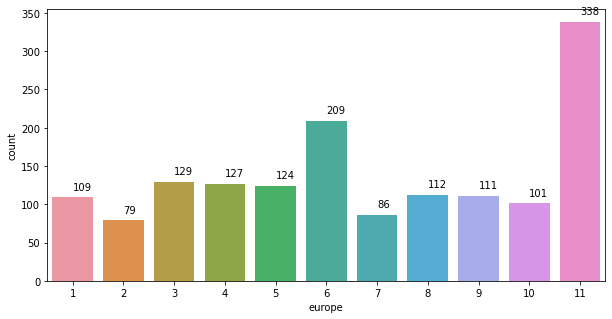

Percentage share:

11    22.163934
6     13.704918
3      8.459016
4      8.327869
5      8.131148
8      7.344262
9      7.278689
1      7.147541
10     6.622951
7      5.639344
2      5.180328
Name: europe, dtype: float64
---------------------------------------------------------------------------------------

Variable: political_knowledge

The number of unique entries in the column political_knowledge : 4

The entry with the highest frequency in political_knowledge : 2



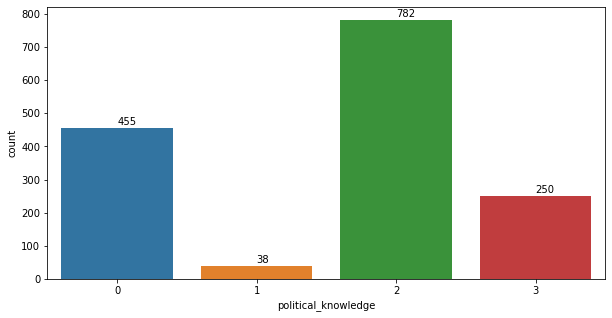

Percentage share:

2    51.278689
0    29.836066
3    16.393443
1     2.491803
Name: political_knowledge, dtype: float64
---------------------------------------------------------------------------------------

Variable: gender

The number of unique entries in the column gender : 2

The entry with the highest frequency in gender : female



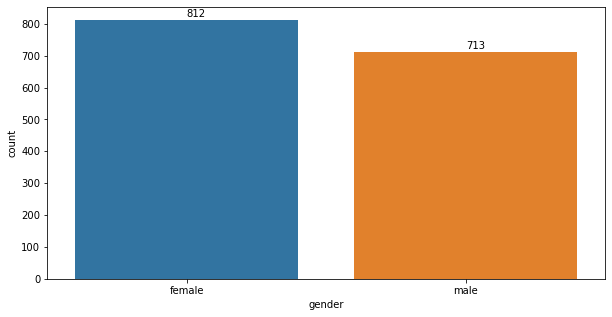

Percentage share:

female    53.245902
male      46.754098
Name: gender, dtype: float64
---------------------------------------------------------------------------------------


In [20]:
# Univariate analysis for categorical variables that plots the bar graph, number of unique classes, mode class and percentage share of each class
data = df_election[cat].copy()
for j in cat:
    print('\nVariable: \033[1m'+j+'\033[0m\n')
    print('The number of unique entries in the column %s : %d\n'%(j, data[j].nunique()))
    print('The entry with the highest frequency in %s : %s\n'%(j, data[j].mode()[0]))
    fig, axes = plt.subplots(ncols=1)
    fig.set_size_inches(10,5)
    sns.countplot(data[j])
    for p in axes.patches:
        axes.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+(p.get_width()/2), p.get_height()+10))
    plt.show()
    print('Percentage share:\n')
    print(data[j].value_counts(normalize=True)*100)
    print('---------------------------------------------------------------------------------------')

-	age variable has no outliers and is almost normally distributed (very slightly right skewed)
-	vote (target variable is not imbalanced) not required to balance data
-	Except in vote and europe variables, all the other variables have their modal class at 40%-55% of the total number of entries
-	economic_cond_national and economic_cond_household have very similar class distributions
-	there is equal sampling of male and female voters
-	blair and hague is the assessment scores of labour and conservative leader. The score for 3 is the least this very clearly shows that almost the entire crowd has already made up their mind as to whom they want to vote
-	the blair and hague score also shows that for blair modal class is 4 while for hague it is 2. Meaning that the labour is evaluated better than the conservative. Also the labour leader has a clear evaluation done while the people are still a little confused about hague as the difference between classes 2 and 4 are very less. This shows that people are skeptic about the conservative leader while they are sure of labour leader.
-	the modal class in europe variable is 11 highly euroskeptic the next highest frequency class is the middle class (6th class) which mostly depicts neutral feeling towards EU. The remaining distribution of classes are almost the same and hence may prove to be a weak predictor

-----

### Bivariate Analysis

Variable: age vs Vote 


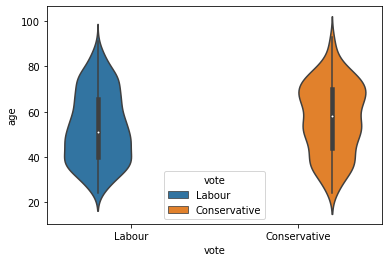

---------------------------------------------------------------------------------------


In [21]:
# Plotting the cotinuous variables against the target variable (vote)
data = df_election
for i in cont:
    if i != 'vote':
        print('Variable: \033[1m'+i+' vs '+'Vote \033[1m')
        sns.violinplot(data=data, x='vote', y=i, hue='vote', ci=False)
        plt.show()
        print('---------------------------------------------------------------------------------------')

Variable: age vs Vote 


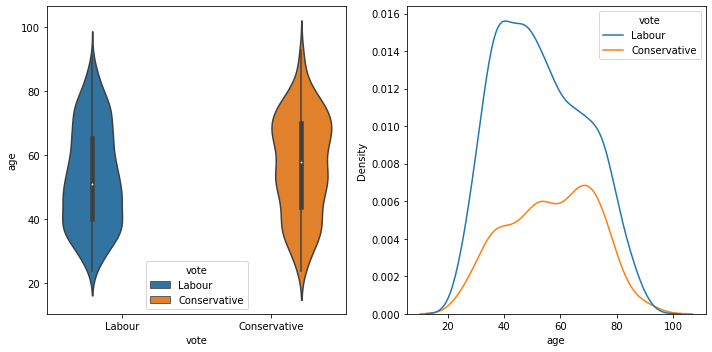

---------------------------------------------------------------------------------------


In [22]:
# Plotting the cotinuous variables against the target variable (vote)
data = df_election
for i in cont:
    if i != 'vote':
        print('Variable: \033[1m'+i+' vs '+'Vote \033[1m')
        fig, axes = plt.subplots(ncols=2)
        fig.set_size_inches(10,5)
        sns.violinplot(data=data, x='vote', y=i, hue='vote', ci=False, ax=axes[:][0])
        sns.kdeplot(data=data, x='age', hue='vote', ax=axes[:][1])
        plt.tight_layout()
        plt.show()
        plt.show()
        print('---------------------------------------------------------------------------------------')

Variable: economic_cond_national vs vote 


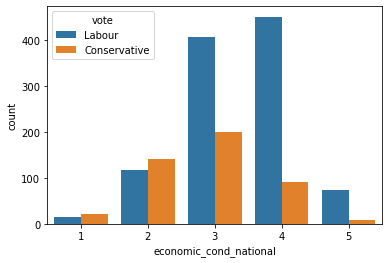

---------------------------------------------------------------------------------------
Variable: economic_cond_household vs vote 


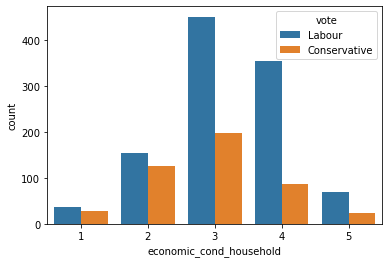

---------------------------------------------------------------------------------------
Variable: blair vs vote 


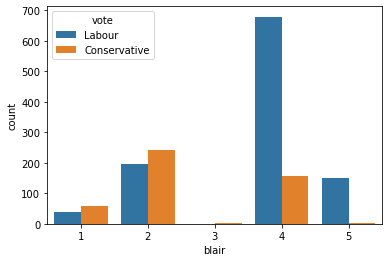

---------------------------------------------------------------------------------------
Variable: hague vs vote 


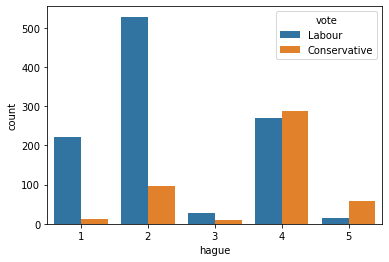

---------------------------------------------------------------------------------------
Variable: europe vs vote 


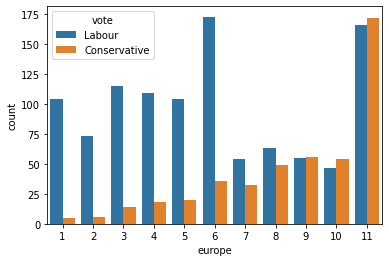

---------------------------------------------------------------------------------------
Variable: political_knowledge vs vote 


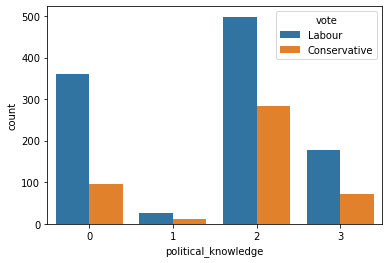

---------------------------------------------------------------------------------------
Variable: gender vs vote 


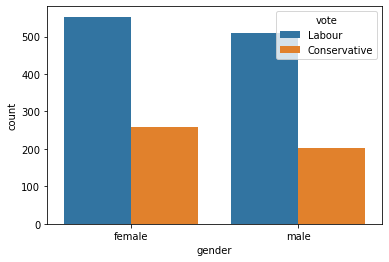

---------------------------------------------------------------------------------------


In [23]:
# Plotting the cotinuous variables against the target variable (Holiday Package)
data = df_election.copy()
for i in cat:
    if i != 'vote':
        print('Variable: \033[1m'+i+' vs '+'vote \033[1m')
        sns.countplot(data[i],hue=data['vote'])
        plt.show()
        print('---------------------------------------------------------------------------------------')

-	Lower age groups are more likely to vote for labour party and older age groups incline towards conservative party
-	For lower scores in economic_cond_national and blair, voters are likely to vote for conservative party and for voters with higher scores are more likely to vote for labour party
-	In economic_cond_household and political_knowledge, for all the scores, the voters are likely to vote for labour party. Hence, this variable may prove to be a poor predictor
-	For lower scored in hague and europe, voters are likely to vote for labour party and for voters with higher scores are more likely to vote for conservative party

------

### Multivariate Analysis

Doing a pair plot or a correlation plot is meaning less as all variables except age are categorical.

In [24]:
# Conerting hte varibles to the integer data type so that we can plot a pariplot
for i in df_election.columns:
    if df_election[i].dtype == 'object' and i!='vote' and i!='gender':
        df_election[i] = df_election[i].astype(int)

In [25]:
# Checking the data types
df_election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic_cond_national   1525 non-null   int64 
 3   economic_cond_household  1525 non-null   int64 
 4   blair                    1525 non-null   int64 
 5   hague                    1525 non-null   int64 
 6   europe                   1525 non-null   int64 
 7   political_knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


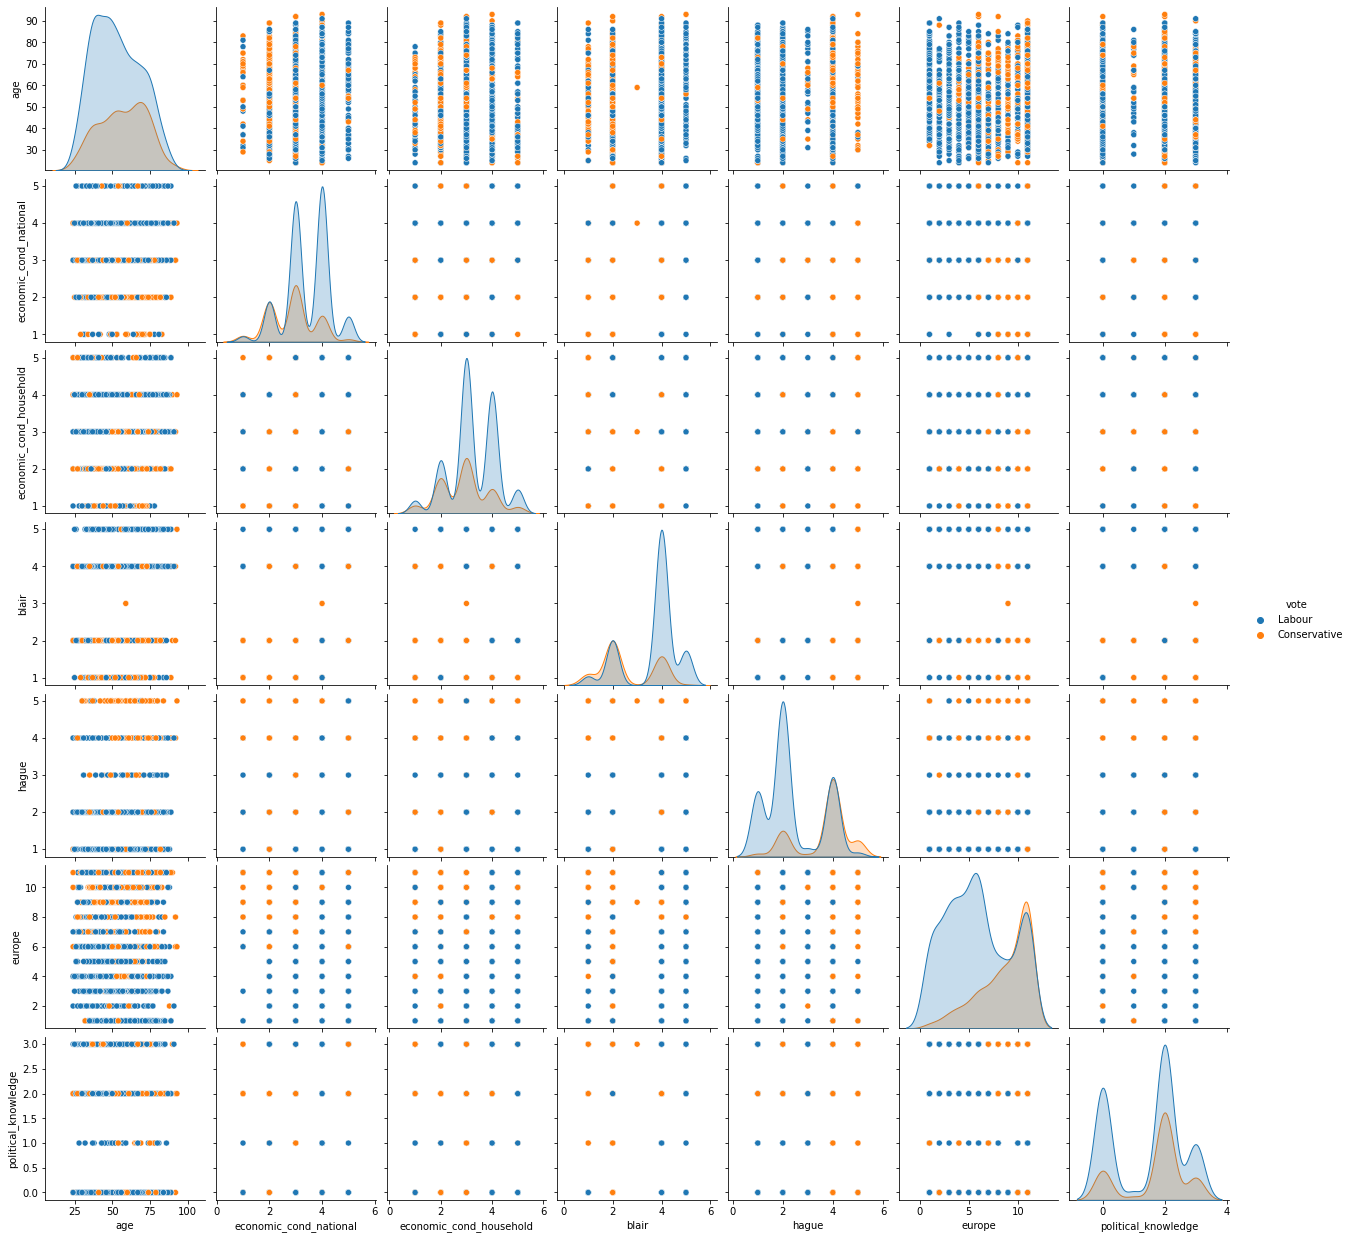

In [26]:
# Pairplot. of the data
sns.pairplot(df_election, diag_kind='kde', hue='vote')

-	From the pair plot, it can be observed that the labour class has a distinct region whereas the conservative class almost always over laps with the labour region. This may cause a little difficulty in predicting the conservative class.

<AxesSubplot:>

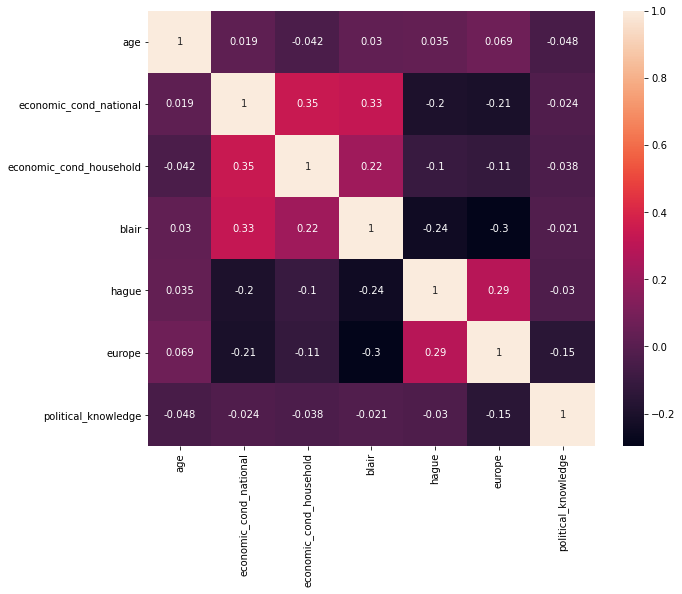

In [27]:
# Heatmap for the data
plt.figure(figsize=(10,8))
sns.heatmap(df_election.corr(), annot=True)

-	There is no multi-collinearity amongst the independent variables.

In [28]:
# Tab to assess the split of number of votes for each party for different scores of blair
pd.DataFrame(data=df_election[['blair','vote']].groupby(by=['blair'])['vote'].value_counts())

vote
blair vote              
1     Conservative    59
      Labour          38
2     Conservative   242
      Labour         196
3     Conservative     1
4     Labour         679
      Conservative   157
5     Labour         150
      Conservative     3

In [29]:
# Tab to assess the split of number of votes for each party for different scores of hague
pd.DataFrame(data=df_election[['hague','vote']].groupby(by=['hague'])['vote'].value_counts())

vote
hague vote              
1     Labour         222
      Conservative    11
2     Labour         528
      Conservative    96
3     Labour          28
      Conservative     9
4     Conservative   287
      Labour         271
5     Conservative    59
      Labour          14

Form the above table we can observe that in the blair tab for the score of 4 there are 836 voters out of which 679 voted for labour party. However out of 558 voters who marked a score of  4 in hague only 287 voted for the conservative class. This further strengthens the inference that either hague assessment isn’t very effective in assessing if high score of hague is actually that the voter will vote for the conservative party.

-----

## Data Processing

We do not have any outliers or missing values.

In [30]:
# Creating a deep copy of the original data frame so as to avoid any data loss or manuplation on the original data.
election = df_election.copy()

### Duplicate rows

In [31]:
# Removing the duplicate values as they are redundant and also add weightage to the same point
election = election[~election.duplicated()]

### Encoding
Since the varibles vote and gender are nominal in nature we will go with dummy variable creation.

In [32]:
# Creating a dummy variable column for vote and gender columns
dummy = pd.get_dummies(election[['vote','gender']], drop_first=True, prefix=['vote','gender'])
election = pd.concat([election, dummy], axis=1)
election

,vote,age,economic_cond_national,economic_cond_household,blair,hague,europe,political_knowledge,gender,vote_Labour,gender_male
0,Labour,43,3,3,4,1,2,2,female,1,0
1,Labour,36,4,4,4,4,5,2,male,1,1
2,Labour,35,4,4,5,2,3,2,male,1,1
3,Labour,24,4,2,2,1,4,0,female,1,0
4,Labour,41,2,2,1,1,6,2,male,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male,0,1
1521,Conservative,73,2,2,4,4,8,2,male,0,1
1522,Labour,37,3,3,5,4,2,2,male,1,1
1523,Conservative,61,3,3,1,4,11,2,male,0,1


In [33]:
# We will now drop the nominal data columns (vote and gender)
election.drop(columns=['vote', 'gender'], axis=1, inplace=True)
election

,age,economic_cond_national,economic_cond_household,blair,hague,europe,political_knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1
...,...,...,...,...,...,...,...,...,...
1520,67,5,3,2,4,11,3,0,1
1521,73,2,2,4,4,8,2,0,1
1522,37,3,3,5,4,2,2,1,1
1523,61,3,3,1,4,11,2,0,1


In [34]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1517 non-null   int64
 1   economic_cond_national   1517 non-null   int64
 2   economic_cond_household  1517 non-null   int64
 3   blair                    1517 non-null   int64
 4   hague                    1517 non-null   int64
 5   europe                   1517 non-null   int64
 6   political_knowledge      1517 non-null   int64
 7   vote_Labour              1517 non-null   uint8
 8   gender_male              1517 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 97.8 KB


### Train - Test Split

In [35]:
# We will first Sift out the depednent and independent variables
X = election.drop(columns='vote_Labour', axis=1)
y = election['vote_Labour']

# Splitting the data into train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [36]:
# Testing for class ratio post splitting in the train set
print('Class ratio in the train set:\n',y_train.value_counts(normalize=True)*100)

Class ratio in the train set:
 1    71.065033
0    28.934967
Name: vote_Labour, dtype: float64


In [37]:
# Testing for class ratio post splitting in the test set
print('Class ratio in the test set:\n',y_test.value_counts(normalize=True)*100)

Class ratio in the test set:
 1    66.447368
0    33.552632
Name: vote_Labour, dtype: float64


The ratios are quite camparable to the original data frame and so we will proceed.

### Scalling

In [38]:
# Doing a standard scalar on the train and test data
std = StandardScaler()

# Fitting the train data and transforming the test data based on the train parameters
X_train_reg = std.fit_transform(X_train)
X_test_reg = std.transform(X_test)

-----
## Model Building

### Logistic Regression
**No hyper Parameters**

In [39]:
# Creating an instance of the model
logit = LogisticRegression()

# Training the model with the train data
logit.fit(X_train, y_train)

LogisticRegression()

In [40]:
# Prediction on the training set
ytrain_predict_logit = logit.predict(X_train)

# Prediction on the testing set
ytest_predict_logit = logit.predict(X_test)

Feature importance for logistic regression:
Feature: age, Score: -0.01381
Feature: economic_cond_national, Score: 0.70157
Feature: economic_cond_household, Score: 0.11708
Feature: blair, Score: 0.57773
Feature: hague, Score: -0.81415
Feature: europe, Score: -0.19774
Feature: political_knowledge, Score: -0.27651
Feature: gender_male, Score: 0.33242


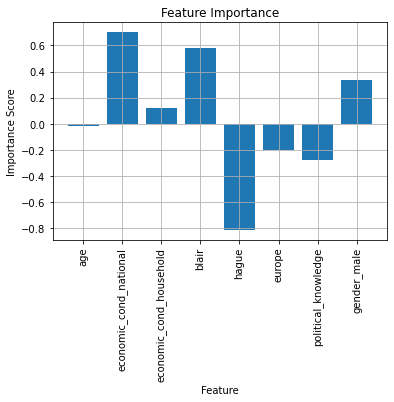

In [41]:
# Feature importance for logistic regression
print('Feature importance for logistic regression:')
importance = logit.coef_[0]
# Summarize feature importance
for i,v in enumerate(importance):
        print('Feature: %0s, Score: %.5f' % (election.drop('vote_Labour', axis=1).columns[i],v))
# Plot feature importance
plt.bar([x for x in (election.drop('vote_Labour', axis=1).columns)], importance)
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.grid()
plt.show()

Logistic Regression Model (Train Data):
Confusion Matrix:


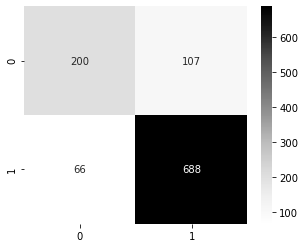

The classification report:
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [42]:
# Confussion matrix and report for logistic regression and train data
print('Logistic Regression Model (Train Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict_logit)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train, ytrain_predict_logit))
# Obtaining the train metrics into variables
logit_metrics=classification_report(y_train, ytrain_predict_logit, output_dict=True)
df=pd.DataFrame(logit_metrics).transpose()
logit_train_f1=round(df.loc["1"][2],2)
logit_train_recall=round(df.loc["1"][1],2)
logit_train_precision=round(df.loc["1"][0],2)
logit_train_acc=round(df.loc["accuracy"][2],2)

Logistic Regression Model (Test Data):
Confusion Matrix:


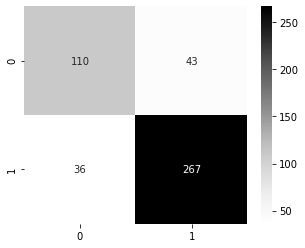

The classification report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



In [43]:
# Confussion matrix and report for logistic regression and test data
print('Logistic Regression Model (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_logit)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_logit))
# Obtaining the test metrics into variables
logit_metrics=classification_report(y_test, ytest_predict_logit, output_dict=True)
df=pd.DataFrame(logit_metrics).transpose()
logit_test_f1=round(df.loc["1"][2],2)
logit_test_recall=round(df.loc["1"][1],2)
logit_test_precision=round(df.loc["1"][0],2)
logit_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 0.890
AUC (Test): 0.880


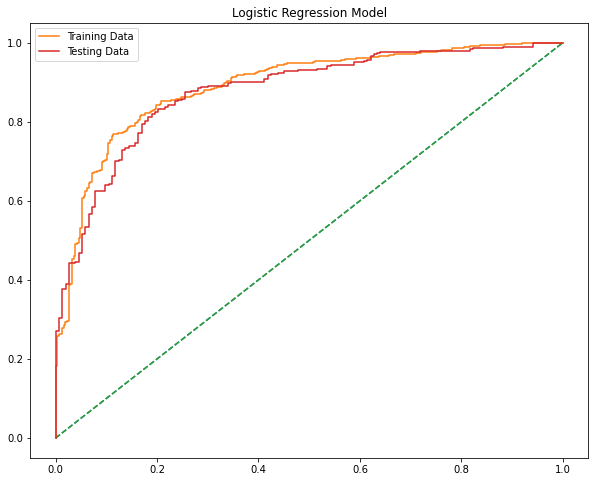

In [44]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = logit.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_train_auc = round(roc_auc_score(y_train, probs),2)
print('AUC (Train): %.3f' % logit_train_auc)
# calculate roc curve
logit_train_fpr, logit_train_tpr, logit_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_train_fpr, logit_train_tpr, label='Training Data')
plt.title('Logistic Regression Model')

# For test data
probs = logit.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % logit_test_auc)
# calculate roc curve
logit_test_fpr, logit_test_tpr, logit_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_test_fpr, logit_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

**GridSearchCV**

In [45]:
# Initializing parameters
param_grid_logit = {'max_iter': [50, 100, 1000],
                         'penalty': ['15', 'l2', '6'],
                         'solver': ['saga', 'sag', 'lbfgs', 'newton-cg', 'liblinear'],
                         'tol': [0.001, 0.0001, 1e-05]}

In [46]:
# Initialting the grid search
grid_search_logit = GridSearchCV(estimator = logit, param_grid = param_grid_logit, cv = 3,n_jobs=-1,scoring='f1')

In [47]:
# Fitting the train data 
grid_search_logit.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [50, 100, 1000],
                         'penalty': ['15', 'l2', '6'],
                         'solver': ['saga', 'sag', 'lbfgs', 'newton-cg',
                                    'liblinear'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [48]:
# Obtaining the best hyper parameters
print(grid_search_logit.best_params_)

{'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}


In [49]:
logit_tune = grid_search_logit.best_estimator_

In [50]:
# Prediction on the training set
ytrain_predict_logit_tune = logit_tune.predict(X_train)

# Prediction on the testing set
ytest_predict_logit_tune = logit_tune.predict(X_test)

Feature importance for logistic regression (Post tunning):
Feature: age, Score: -0.01242
Feature: economic_cond_national, Score: 0.66577
Feature: economic_cond_household, Score: 0.09256
Feature: blair, Score: 0.61936
Feature: hague, Score: -0.79885
Feature: europe, Score: -0.20252
Feature: political_knowledge, Score: -0.30344
Feature: gender_male, Score: 0.20659


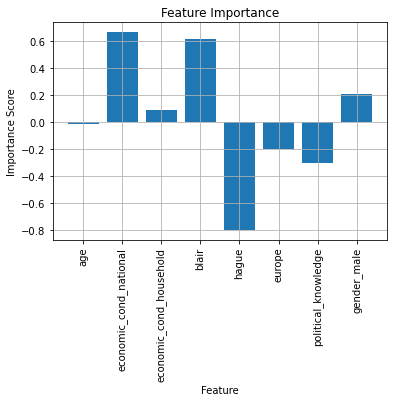

In [51]:
# Feature importance for logistic regression
print('Feature importance for logistic regression (Post tunning):')
importance = logit_tune.coef_[0]
# Summarize feature importance
for i,v in enumerate(importance):
        print('Feature: %0s, Score: %.5f' % (election.drop('vote_Labour', axis=1).columns[i],v))
# Plot feature importance
plt.bar([x for x in (election.drop('vote_Labour', axis=1).columns)], importance)
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.grid()
plt.show()

Logistic Regression Model [Post tunning] (Train Data):
Confusion Matrix:


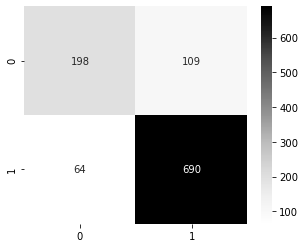

The classification report:
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [52]:
# Confussion matrix and report for logistic regression (Post tunning) and train data
print('Logistic Regression Model [Post tunning] (Train Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict_logit_tune)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train, ytrain_predict_logit_tune))
# Obtaining the train metrics into variables
logit_tune_metrics=classification_report(y_train, ytrain_predict_logit_tune, output_dict=True)
df=pd.DataFrame(logit_tune_metrics).transpose()
logit_tune_train_f1=round(df.loc["1"][2],2)
logit_tune_train_recall=round(df.loc["1"][1],2)
logit_tune_train_precision=round(df.loc["1"][0],2)
logit_tune_train_acc=round(df.loc["accuracy"][2],2)

Logistic Regression Model [Post tunning] (Test Data):
Confusion Matrix:


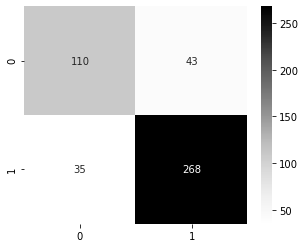

The classification report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [53]:
# Confussion matrix and report for logistic regression and test data
print('Logistic Regression Model [Post tunning] (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_logit_tune)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_logit_tune))
# Obtaining the test metrics into variables
logit_tune_metrics=classification_report(y_test, ytest_predict_logit_tune, output_dict=True)
df=pd.DataFrame(logit_tune_metrics).transpose()
logit_tune_test_f1=round(df.loc["1"][2],2)
logit_tune_test_recall=round(df.loc["1"][1],2)
logit_tune_test_precision=round(df.loc["1"][0],2)
logit_tune_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 0.890
AUC (Test): 0.880


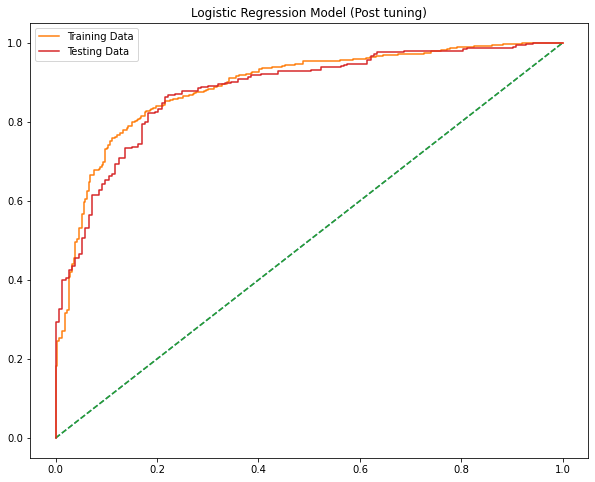

In [54]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = logit_tune.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_tune_train_auc = round(roc_auc_score(y_train, probs),2)
print('AUC (Train): %.3f' % logit_tune_train_auc)
# calculate roc curve
logit_train_fpr, logit_train_tpr, logit_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_train_fpr, logit_train_tpr, label='Training Data')
plt.title('Logistic Regression Model (Post tuning)')

# For test data
probs = logit_tune.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_tune_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % logit_tune_test_auc)
# calculate roc curve
logit_tune_test_fpr, logit_tune_test_tpr, logit_tune_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_tune_test_fpr, logit_tune_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

In [55]:
print('\n\n\033[1mLogistic Regression (All parameters in %)\033[0m')
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Regression (Train)':[logit_train_acc,logit_train_auc,logit_train_recall,logit_train_precision,logit_train_f1],
                     'Logistic Regression_Tune (Train)':[logit_tune_train_acc,logit_tune_train_auc,logit_tune_train_recall,logit_tune_train_precision,logit_tune_train_f1],
                    'Logistic Regression (Test)':[logit_test_acc,logit_test_auc,logit_test_recall,logit_test_precision,logit_test_f1],
                    'Logistic Regression_Tune (Test)':[logit_tune_test_acc,logit_tune_test_auc,logit_tune_test_recall,logit_tune_test_precision,logit_tune_test_f1]},index=index)
logit_performance = round(data,2)*100
logit_performance.T



Logistic Regression (All parameters in %)


,Accuracy,AUC,Recall,Precision,F1 Score
Logistic Regression (Train),84.0,89.0,91.0,87.0,89.0
Logistic Regression_Tune (Train),84.0,89.0,92.0,86.0,89.0
Logistic Regression (Test),83.0,88.0,88.0,86.0,87.0
Logistic Regression_Tune (Test),83.0,88.0,88.0,86.0,87.0


### Linear Discriminant Analysis
**Max likelihood is the default (0.5)**

In [56]:
# Creating an instance of the model
lda = LinearDiscriminantAnalysis()

# Training the model with the train data
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [57]:
# Prediction on the training set
ytrain_predict_lda = lda.predict(X_train)

# Prediction on the testing set
ytest_predict_lda = lda.predict(X_test)

Feature importance for LDA:
Feature: age, Score: -0.02004
Feature: economic_cond_national, Score: 0.60492
Feature: economic_cond_household, Score: 0.05007
Feature: blair, Score: 0.74240
Feature: hague, Score: -0.92663
Feature: europe, Score: -0.22361
Feature: political_knowledge, Score: -0.43033
Feature: gender_male, Score: 0.14908


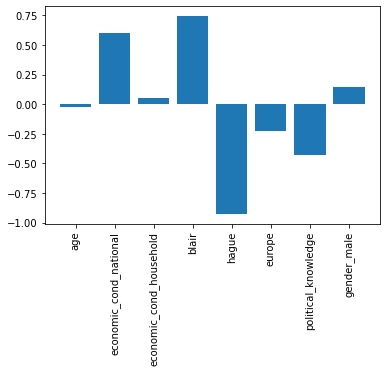

In [58]:
# Feature importance for logistic regression
print('Feature importance for LDA:')
importance = lda.coef_[0]
# Summarize feature importance
for i,v in enumerate(importance):
        print('Feature: %0s, Score: %.5f' % (election.drop('vote_Labour', axis=1).columns[i],v))
# Plot feature importance
plt.bar([x for x in (election.drop('vote_Labour', axis=1).columns)], importance)
plt.xticks(rotation=90)
plt.show()

LDA Model (Train Data):
Confusion Matrix:


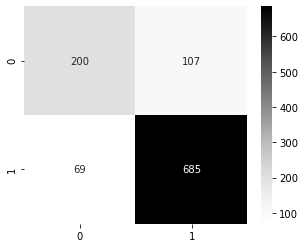

The classification report:
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [59]:
# Confussion matrix and report for LDA on train data
print('LDA Model (Train Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict_lda)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train, ytrain_predict_lda))
# Obtaining the train metrics into variables
lda_metrics=classification_report(y_train, ytrain_predict_lda, output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
lda_train_acc=round(df.loc["accuracy"][2],2)

LDA Model (Test Data):
Confusion Matrix:


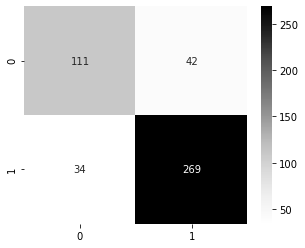

The classification report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



In [60]:
# Confussion matrix and report for LDA on test data
print('LDA Model (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_lda)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_lda))
# Obtaining the test metrics into variables
lda_metrics=classification_report(y_test, ytest_predict_lda, output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
lda_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 0.890
AUC (Test): 0.890


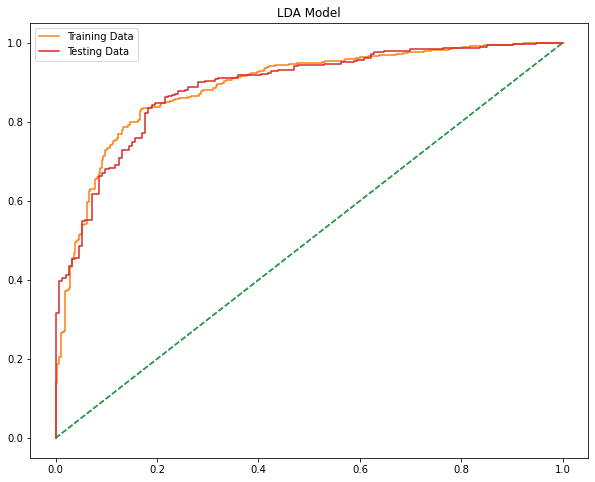

In [61]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = round(roc_auc_score(y_train, probs),2)
print('AUC (Train): %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, label='Training Data')
plt.title('LDA Model')

# For test data
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

**Custom threshold/max likelihood**

In [62]:
# Obtaining the probability of the prediction for train and test data
pred_prob_train = lda.predict_proba(X_train)
pred_prob_test = lda.predict_proba(X_test)

When the cut-off probability is 0.30
Accuracy: 0.813
F1-Score: 0.879
Confussion Matrix:


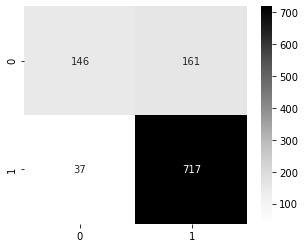

---------------------------------------------------------------


When the cut-off probability is 0.40
Accuracy: 0.834
F1-Score: 0.890
Confussion Matrix:


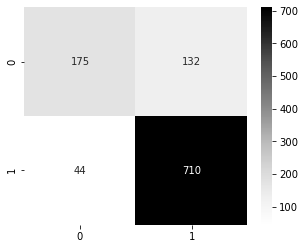

---------------------------------------------------------------


When the cut-off probability is 0.50
Accuracy: 0.834
F1-Score: 0.886
Confussion Matrix:


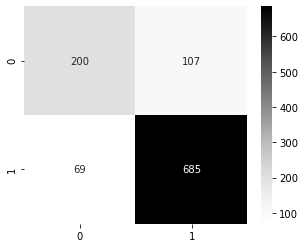

---------------------------------------------------------------


When the cut-off probability is 0.60
Accuracy: 0.828
F1-Score: 0.878
Confussion Matrix:


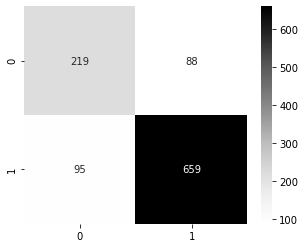

---------------------------------------------------------------


When the cut-off probability is 0.70
Accuracy: 0.830
F1-Score: 0.875
Confussion Matrix:


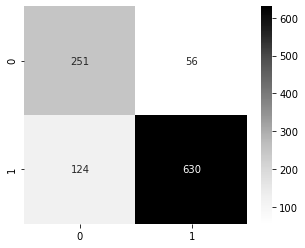

---------------------------------------------------------------


When the cut-off probability is 0.80
Accuracy: 0.791
F1-Score: 0.836
Confussion Matrix:


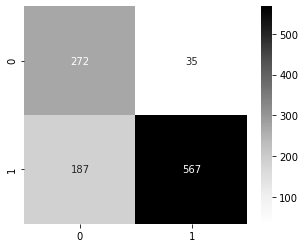

---------------------------------------------------------------


When the cut-off probability is 0.90
Accuracy: 0.697
F1-Score: 0.738
Confussion Matrix:


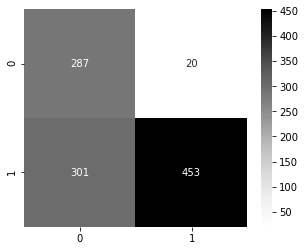

---------------------------------------------------------------




In [63]:
# We will perform the classification with the probability for various values of threshold
# We will then find the accuracy and F1 score for the different values
acc_mat=[]
f1_mat=[]
for j in np.arange(0.3, 1, 0.1):
    custom_prob = j # Defining the new cut off value of our choice
    custom_cutoff_data = [] # Initiating an empty list that will be used to store the dependent variables class
    for i in range(0, len(y_train)):
        if np.array(pred_prob_train[:,1][i]>custom_prob):
            a = 1 # If probability is greater than the cut off then 1
        else:
            a = 0 # If probability is lesser than the cut off then 0
        custom_cutoff_data.append(a) # Appending the class to the list of outputs
    
    # Displaying the confusion matrix along with the accuracy and F1 score for each case
    print('When the cut-off probability is %0.2f' %j)
    print('Accuracy: %0.3f'%(metrics.accuracy_score(y_train, custom_cutoff_data)))
    print('F1-Score: %0.3f'%(metrics.f1_score(y_train, custom_cutoff_data)))  
    acc_mat.append(metrics.accuracy_score(y_train, custom_cutoff_data))
    f1_mat.append(metrics.f1_score(y_train, custom_cutoff_data))
    print('Confussion Matrix:')
    plt.figure(figsize=(5,4))
    sns.heatmap((metrics.confusion_matrix(y_train, custom_cutoff_data)), annot=True, cmap='Greys', fmt='0.4g')
    plt.show()
    print('---------------------------------------------------------------\n\n')

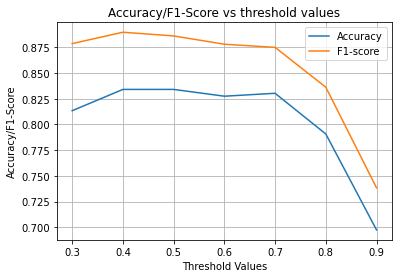

In [64]:
# Plotting the various values of accuracy and f1 values
plt.plot(np.arange(0.3, 1, 0.1), acc_mat, label='Accuracy')
plt.plot(np.arange(0.3, 1, 0.1), f1_mat, label='F1-score' )
plt.title('Accuracy/F1-Score vs threshold values')
plt.xlabel('Threshold Values')
plt.ylabel('Accuracy/F1-Score')
plt.legend(loc='best')
plt.grid()
plt.show()

LDA Model Custom Cut-off=0.4 (Train Data):
When the cut-off probability is 0.4
Confusion Matrix:


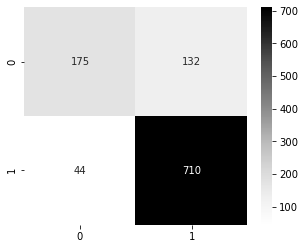

The classification report:
              precision    recall  f1-score   support

           0       0.80      0.57      0.67       307
           1       0.84      0.94      0.89       754

    accuracy                           0.83      1061
   macro avg       0.82      0.76      0.78      1061
weighted avg       0.83      0.83      0.82      1061



In [65]:
# For the cut-off of 0.4

# Train data
custom_prob = 0.4
print('LDA Model Custom Cut-off={} (Train Data):'.format(custom_prob))
custom_cutoff_data_train = []
for i in range(0, len(y_train)):
    if np.array(pred_prob_train[:,1][i]>custom_prob):
        a = 1 # If probability is greater than the cut off then 1
    else:
        a = 0 # If probability is lesser than the cut off then 0
    custom_cutoff_data_train.append(a) # Appending the class to the list of outputs

# Displaying the confusion matrix along with the accuracy and F1 score for each case
print('When the cut-off probability is %0.1f' %custom_prob)
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train, custom_cutoff_data_train)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train, custom_cutoff_data_train))

LDA Model Custom Cut-off=0.4 (Test Data):
When the cut-off probability is 0.4
Confusion Matrix:


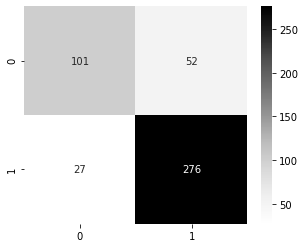

The classification report:
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       153
           1       0.84      0.91      0.87       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456



In [66]:
# Test data
custom_prob = 0.4
print('LDA Model Custom Cut-off={} (Test Data):'.format(custom_prob))
custom_cutoff_data_test = []
for i in range(0, len(y_test)):
    if np.array(pred_prob_test[:,1][i]>custom_prob):
        a = 1 # If probability is greater than the cut off then 1
    else:
        a = 0 # If probability is lesser than the cut off then 0
    custom_cutoff_data_test.append(a) # Appending the class to the list of outputs

# Displaying the confusion matrix along with the accuracy and F1 score for each case
print('When the cut-off probability is %0.1f' %custom_prob)  
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, custom_cutoff_data_test)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, custom_cutoff_data_test))

In [67]:
# Obtaining the train metrics into variables
lda_metrics=classification_report(y_train, custom_cutoff_data_train, output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
ldacust_train_f1=round(df.loc["1"][2],2)
ldacust_train_recall=round(df.loc["1"][1],2)
ldacust_train_precision=round(df.loc["1"][0],2)
ldacust_train_acc=round(df.loc["accuracy"][2],2)

In [68]:
# Obtaining the test metrics into variables
lda_metrics=classification_report(y_test, custom_cutoff_data_test, output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
ldacust_test_f1=round(df.loc["1"][2],2)
ldacust_test_recall=round(df.loc["1"][1],2)
ldacust_test_precision=round(df.loc["1"][0],2)
ldacust_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 0.890
AUC (Test): 0.890


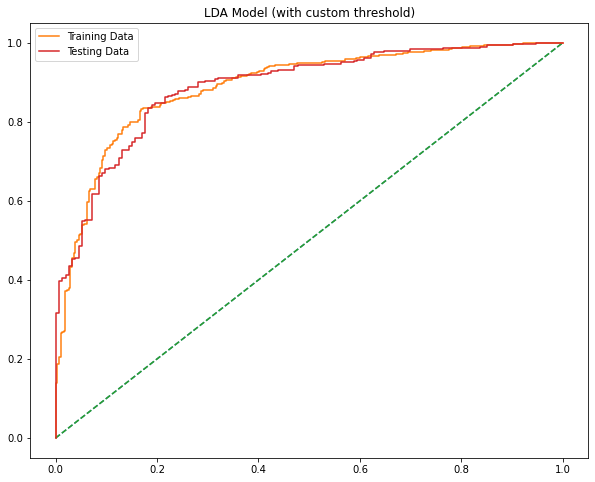

In [69]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ldacust_train_auc = round(roc_auc_score(y_train, probs),2)
print('AUC (Train): %.3f' % ldacust_train_auc)
# calculate roc curve
ldacust_train_fpr, ldacust_train_tpr, ldacust_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ldacust_train_fpr, ldacust_train_tpr, label='Training Data')
plt.title('LDA Model (with custom threshold)')

# For test data
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ldacust_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % ldacust_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

In [70]:
print('\n\n\033[1mLDA (All parameters in %)\033[0m')
data = pd.DataFrame({'LDA (Train)':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
                     'LDA [Thresh>0.4] (Train)':[ldacust_train_acc,ldacust_train_auc,ldacust_train_recall,ldacust_train_precision,ldacust_train_f1],
                    'LDA (Test)':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
                    'LDA [Thresh>0.4] (Test)':[ldacust_test_acc,ldacust_test_auc,ldacust_test_recall,ldacust_test_precision,ldacust_test_f1]},index=index)
lda_performance = round(data,2)*100
lda_performance.T



LDA (All parameters in %)


,Accuracy,AUC,Recall,Precision,F1 Score
LDA (Train),83.0,89.0,91.0,86.0,89.0
LDA [Thresh>0.4] (Train),83.0,89.0,94.0,84.0,89.0
LDA (Test),83.0,89.0,89.0,86.0,88.0
LDA [Thresh>0.4] (Test),83.0,89.0,91.0,84.0,87.0


### K Nearest Neighbors

In [71]:
# To find the square root of the number of observations (thumb rule)
round(np.sqrt(election.shape[0]))

39

As a ball park number, based on the thumb rule of chosing k for 2 class classification, we get 39. Let us compute the scores of the model for a range of k values to find the best value for k.

In [72]:
# Initializing an empty list
score = []

# Initializing a for loop to run the KNN model for various values of k
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance') # Creating an instance of the model
    knn.fit(X_train_reg, y_train) # Training the model
    score.append(knn.score(X_test_reg, y_test)) # Appending the computed score to a list

Text(0, 0.5, 'Scores')

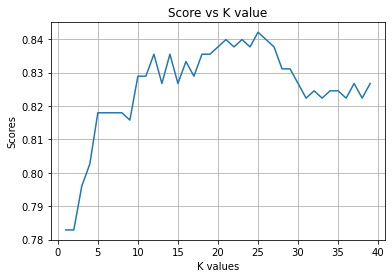

In [73]:
# Plotting the score correspoding to various values of k
plt.plot(range(1,40), score)
plt.grid()
plt.title('Score vs K value')
plt.xlabel('K values')
plt.ylabel('Scores')

From the above graph we can infer that a k value of 25 will give the maximum score

In [74]:
# Initializing a mode for k=25
knn = KNeighborsClassifier(n_neighbors=25, weights='distance')

# Training the model
knn.fit(X_train_reg, y_train)

KNeighborsClassifier(n_neighbors=25, weights='distance')

In [75]:
# Obtaining the score for the test data
knn.score(X_test_reg, y_test)

0.8421052631578947

In [76]:
# Predicting the labels
ytest_predict_knn = knn.predict(X_test_reg)

KNN Model (Test Data):
Confusion Matrix:


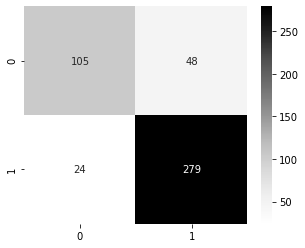

The classification report:
              precision    recall  f1-score   support

           0       0.81      0.69      0.74       153
           1       0.85      0.92      0.89       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.82       456
weighted avg       0.84      0.84      0.84       456



In [77]:
# Confussion matrix and report for logistic regression and test data
print('KNN Model (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_knn)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_knn))
# Obtaining the test metrics into variables
lda_metrics=classification_report(y_test, ytest_predict_knn, output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
lda_test_acc=round(df.loc["accuracy"][2],2)

In [78]:
# Obtaining the test metrics into variables
knn_metrics=classification_report(y_test, ytest_predict_knn, output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_test_f1=round(df.loc["1"][2],2)
knn_test_recall=round(df.loc["1"][1],2)
knn_test_precision=round(df.loc["1"][0],2)
knn_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 1.000
AUC (Test): 0.800


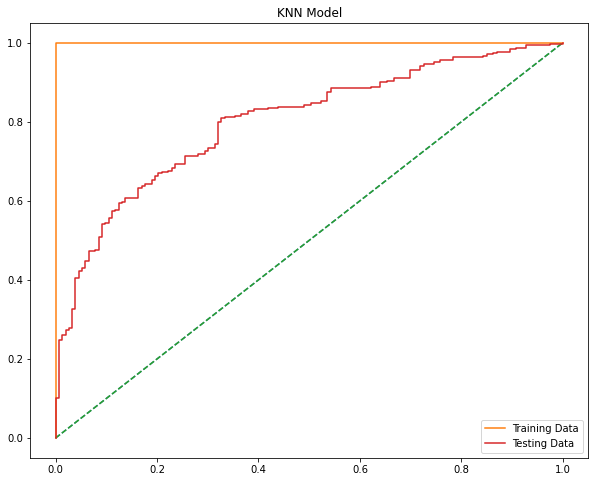

In [79]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = knn.predict_proba(X_train_reg)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = round(roc_auc_score(y_train, probs),2)
print('AUC (Train): %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr, label='Training Data')
plt.title('KNN Model')

# For test data
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

In [80]:
print('\n\n\033[1mKNN (All parameters in %)\033[0m')
data = pd.DataFrame({'KNN (Test)':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1]},index=index)
knn_performance = round(data,2)*100
knn_performance.T



KNN (All parameters in %)


,Accuracy,AUC,Recall,Precision,F1 Score
KNN (Test),84.0,80.0,92.0,85.0,89.0


### Naive Bayes

In [81]:
# Creating an instance of the model
nb = GaussianNB()

# Training the model with the train data
nb.fit(X_train,y_train)

GaussianNB()

In [82]:
# Prediction on the training set
ytrain_predict_nb = nb.predict(X_train)

# Prediction on the testing set
ytest_predict_nb = nb.predict(X_test)

Naive Bayes Model (Train Data):
Confusion Matrix:


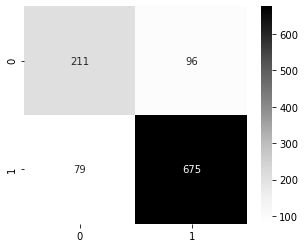

The classification report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [83]:
# Confussion matrix and report for naive bayes on train data
print('Naive Bayes Model (Train Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict_nb)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train, ytrain_predict_nb))
# Obtaining the train metrics into variables
nb_metrics=classification_report(y_train, ytrain_predict_nb, output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_train_f1=round(df.loc["1"][2],2)
nb_train_recall=round(df.loc["1"][1],2)
nb_train_precision=round(df.loc["1"][0],2)
nb_train_acc=round(df.loc["accuracy"][2],2)

Naive Bayes Model (Test Data):
Confusion Matrix:


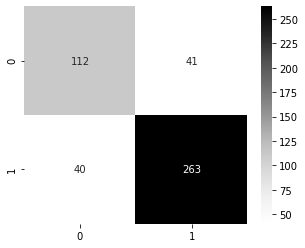

The classification report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [84]:
# Confussion matrix and report for naive bayes on test data
print('Naive Bayes Model (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_nb)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_nb))
# Obtaining the train metrics into variables
nb_metrics=classification_report(y_test, ytest_predict_nb, output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_test_f1=round(df.loc["1"][2],2)
nb_test_recall=round(df.loc["1"][1],2)
nb_test_precision=round(df.loc["1"][0],2)
nb_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 0.890
AUC (Test): 0.880


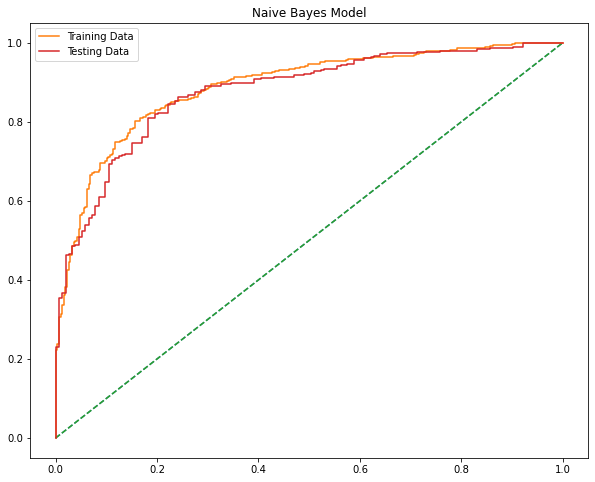

In [85]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = nb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_train_auc = round(roc_auc_score(y_train, probs),2)
print('AUC (Train): %.3f' % nb_train_auc)
# calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr, label='Training Data')
plt.title('Naive Bayes Model')

# For test data
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % nb_test_auc)
# calculate roc curve
nb_test_fpr, nb_test_tpr, nb_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

In [86]:
print('\n\n\033[1mNaive Bayes (All parameters in %)\033[0m')
data = pd.DataFrame({'Naive Bayes (Train)':[nb_train_acc,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
                     'Naive Bayes (Test)':[nb_test_acc,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1]},index=index)
nb_performance = round(data,2)*100
nb_performance.T



Naive Bayes (All parameters in %)


,Accuracy,AUC,Recall,Precision,F1 Score
Naive Bayes (Train),84.0,89.0,90.0,88.0,89.0
Naive Bayes (Test),82.0,88.0,87.0,87.0,87.0


### Boosting
**ADA Boost**

In [87]:
# Creating an instance of the model
ada = AdaBoostClassifier(n_estimators=5000, random_state=1)

# Training the model with the train data 
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=5000, random_state=1)

In [88]:
# Prediction on the training set
ytrain_predict_ada = ada.predict(X_train)

# Prediction on the testing set
ytest_predict_ada = ada.predict(X_test)

ADA Boost Model (Train Data):
Confusion Matrix:


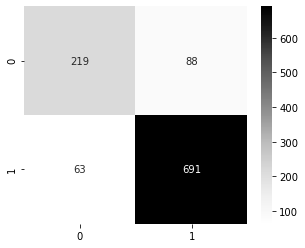

The classification report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.86      0.86      0.86      1061



In [89]:
# Confussion matrix and report for ADA Boost on train data
print('ADA Boost Model (Train Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict_ada)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train, ytrain_predict_ada))
# Obtaining the train metrics into variables
ada_metrics=classification_report(y_train, ytrain_predict_lda, output_dict=True)
df=pd.DataFrame(ada_metrics).transpose()
ada_train_f1=round(df.loc["1"][2],2)
ada_train_recall=round(df.loc["1"][1],2)
ada_train_precision=round(df.loc["1"][0],2)
ada_train_acc=round(df.loc["accuracy"][2],2)

ADA Boost Model (Test Data):
Confusion Matrix:


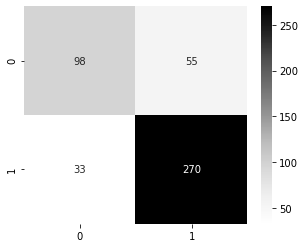

The classification report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       153
           1       0.83      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.80      0.81      0.80       456



In [90]:
# Confussion matrix and report for ADA boost on test data
print('ADA Boost Model (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_ada)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_ada))
# Obtaining the test metrics into variables
ada_metrics=classification_report(y_test, ytest_predict_ada, output_dict=True)
df=pd.DataFrame(ada_metrics).transpose()
ada_test_f1=round(df.loc["1"][2],2)
ada_test_recall=round(df.loc["1"][1],2)
ada_test_precision=round(df.loc["1"][0],2)
ada_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 0.920
AUC (Test): 0.860


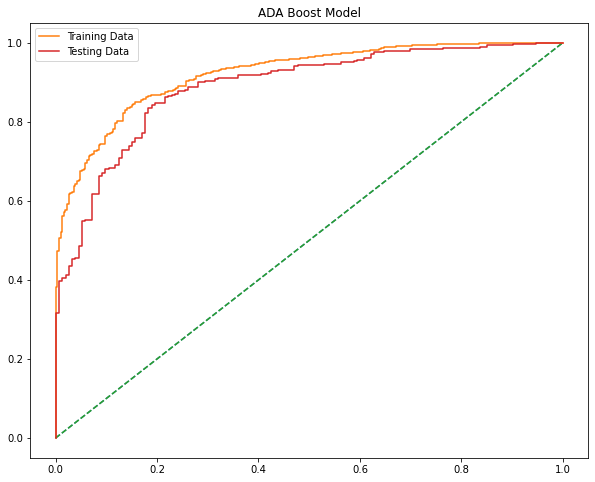

In [91]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = ada.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_train_auc = round(roc_auc_score(y_train, probs),2)
print('AUC (Train): %.3f' % ada_train_auc)
# calculate roc curve
ada_train_fpr, ada_train_tpr, ada_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_train_fpr, ada_train_tpr, label='Training Data')
plt.title('ADA Boost Model')

# For test data
probs = ada.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % ada_test_auc)
# calculate roc curve
ada_test_fpr, ada_test_tpr, ada_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

**Gradient Boost**

In [92]:
# Creating an instance of the model
grad = GradientBoostingClassifier(n_estimators=1000, random_state=1)

# Training the model with the train data 
grad.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=1000, random_state=1)

In [93]:
# Prediction on the training set
ytrain_predict_grad = grad.predict(X_train)

# Prediction on the testing set
ytest_predict_grad = grad.predict(X_test)

Gradient Boost Model (Train Data):
Confusion Matrix:


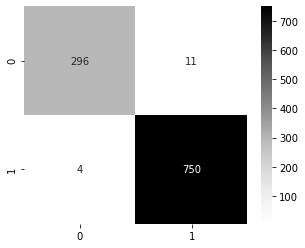

The classification report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       307
           1       0.99      0.99      0.99       754

    accuracy                           0.99      1061
   macro avg       0.99      0.98      0.98      1061
weighted avg       0.99      0.99      0.99      1061



In [94]:
# Confussion matrix and report for ADA Boost on train data
print('Gradient Boost Model (Train Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict_grad)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train, ytrain_predict_grad))
# Obtaining the train metrics into variables
grad_metrics=classification_report(y_train, ytrain_predict_grad, output_dict=True)
df=pd.DataFrame(grad_metrics).transpose()
grad_train_f1=round(df.loc["1"][2],2)
grad_train_recall=round(df.loc["1"][1],2)
grad_train_precision=round(df.loc["1"][0],2)
grad_train_acc=round(df.loc["accuracy"][2],2)

Gradient Boost Model (Test Data):
Confusion Matrix:


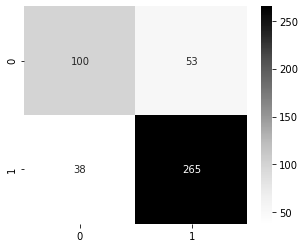

The classification report:
              precision    recall  f1-score   support

           0       0.72      0.65      0.69       153
           1       0.83      0.87      0.85       303

    accuracy                           0.80       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.80      0.80      0.80       456



In [95]:
# Confussion matrix and report for ADA boost on test data
print('Gradient Boost Model (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_grad)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_grad))
# Obtaining the test metrics into variables
grad_metrics=classification_report(y_test, ytest_predict_grad, output_dict=True)
df=pd.DataFrame(grad_metrics).transpose()
grad_test_f1=round(df.loc["1"][2],2)
grad_test_recall=round(df.loc["1"][1],2)
grad_test_precision=round(df.loc["1"][0],2)
grad_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 1.000
AUC (Test): 0.870


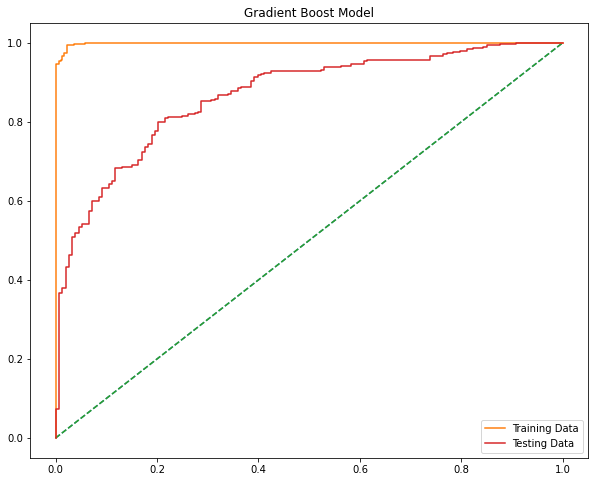

In [96]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = grad.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
grad_train_auc = round(roc_auc_score(y_train, probs),2)
print('AUC (Train): %.3f' % grad_train_auc)
# calculate roc curve
grad_train_fpr, grad_train_tpr, grad_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(grad_train_fpr, grad_train_tpr, label='Training Data')
plt.title('Gradient Boost Model')

# For test data
probs = grad.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
grad_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % grad_test_auc)
# calculate roc curve
grad_test_fpr, grad_test_tpr, grad_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(grad_test_fpr, grad_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

In [97]:
print('\n\n\033[1mBoosting (All parameters in %)\033[0m')
data = pd.DataFrame({'ADA Boost (Train)':[ada_train_acc,ada_train_auc,ada_train_recall,ada_train_precision,ada_train_f1],
                     'Gradient Boost (Train)':[grad_train_acc,grad_train_auc,grad_train_recall,grad_train_precision,grad_train_f1],
                    'ADA Boost (Test)':[ada_test_acc,ada_test_auc,ada_test_recall,ada_test_precision,ada_test_f1],
                    'Gradient Boost (Test)':[grad_test_acc,grad_test_auc,grad_test_recall,grad_test_precision,grad_test_f1]},index=index)
boost_performance = round(data,2)*100
boost_performance.T



Boosting (All parameters in %)


,Accuracy,AUC,Recall,Precision,F1 Score
ADA Boost (Train),83.0,92.0,91.0,86.0,89.0
Gradient Boost (Train),99.0,100.0,99.0,99.0,99.0
ADA Boost (Test),81.0,86.0,89.0,83.0,86.0
Gradient Boost (Test),80.0,87.0,87.0,83.0,85.0


### Bagging
**Normal Bagging**

In [98]:
# Creating an instance of the model
bag = BaggingClassifier(random_state=1)

# Training the model with the train data
bag.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [99]:
# Prediction on the training set
ytrain_predict_bag = bag.predict(X_train)

# Prediction on the testing set
ytest_predict_bag = bag.predict(X_test)

Bagging Model (Train Data):
Confusion Matrix:


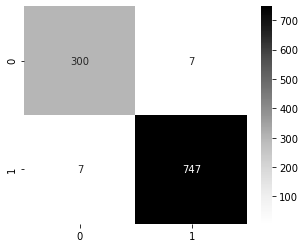

The classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       307
           1       0.99      0.99      0.99       754

    accuracy                           0.99      1061
   macro avg       0.98      0.98      0.98      1061
weighted avg       0.99      0.99      0.99      1061



In [100]:
# Confussion matrix and report for ADA Boost on train data
print('Bagging Model (Train Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict_bag)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train, ytrain_predict_bag))
# Obtaining the train metrics into variables
bag_metrics=classification_report(y_train, ytrain_predict_bag, output_dict=True)
df=pd.DataFrame(bag_metrics).transpose()
bag_train_f1=round(df.loc["1"][2],2)
bag_train_recall=round(df.loc["1"][1],2)
bag_train_precision=round(df.loc["1"][0],2)
bag_train_acc=round(df.loc["accuracy"][2],2)

Bagging Model (Test Data):
Confusion Matrix:


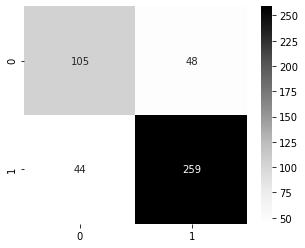

The classification report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.70       153
           1       0.84      0.85      0.85       303

    accuracy                           0.80       456
   macro avg       0.77      0.77      0.77       456
weighted avg       0.80      0.80      0.80       456



In [101]:
# Confussion matrix and report for ADA boost on test data
print('Bagging Model (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_bag)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_bag))
# Obtaining the test metrics into variables
bag_metrics=classification_report(y_test, ytest_predict_bag, output_dict=True)
df=pd.DataFrame(bag_metrics).transpose()
bag_test_f1=round(df.loc["1"][2],2)
bag_test_recall=round(df.loc["1"][1],2)
bag_test_precision=round(df.loc["1"][0],2)
bag_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 1.000
AUC (Test): 0.850


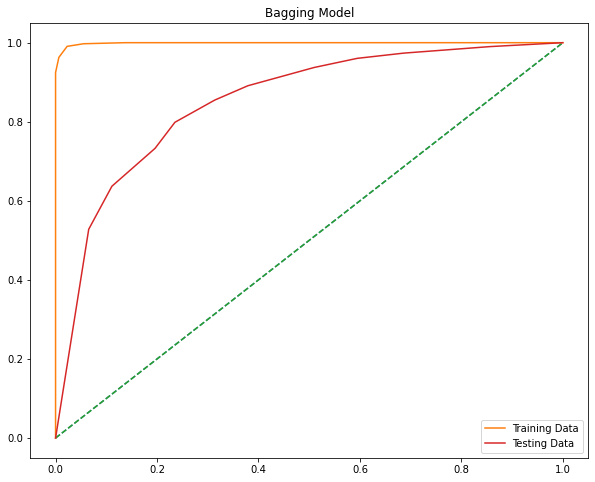

In [102]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = bag.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_train_auc = round(roc_auc_score(y_train, probs),2)
print('AUC (Train): %.3f' % bag_train_auc)
# calculate roc curve
bag_train_fpr, bag_train_tpr, bag_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_train_fpr, bag_train_tpr, label='Training Data')
plt.title('Bagging Model')

# For test data
probs = bag.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % bag_test_auc)
# calculate roc curve
bag_test_fpr, bag_test_tpr, bag_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_test_fpr, bag_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

**Random Forest with grid search**

In [103]:
# Creating an instance of the model
rf = RandomForestClassifier(random_state=1)

In [104]:
# Initializing the different hyper parameters
param_grid_rf = {
    'max_features': [3, 4, 6],
    'min_samples_leaf': [2, 10, 50, 100],
    'min_samples_split': [50, 100, 150, 300],
    'n_estimators': [100, 200, 301]
}

In [105]:
# Fitting the train data
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 3)

In [106]:
# Fitting the train data into the grid search
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_features': [3, 4, 6],
                         'min_samples_leaf': [2, 10, 50, 100],
                         'min_samples_split': [50, 100, 150, 300],
                         'n_estimators': [100, 200, 301]})

In [107]:
# Obtaining the best hyper parameters
print(grid_search_rf.best_params_)

{'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 50, 'n_estimators': 200}


In [108]:
# Obtaining the best classifier
rf_tune = grid_search_rf.best_estimator_

In [109]:
# Prediction on the training set
ytrain_predict_rf_tune = rf_tune.predict(X_train)

# Prediction on the testing set
ytest_predict_rf_tune = rf_tune.predict(X_test)

Random Forest Model (Train Data):
Confusion Matrix:


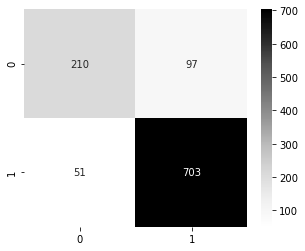

The classification report:
              precision    recall  f1-score   support

           0       0.80      0.68      0.74       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.81      0.82      1061
weighted avg       0.86      0.86      0.86      1061



In [110]:
# Confussion matrix and report for ADA Boost on train data
print('Random Forest Model (Train Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict_rf_tune)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train, ytrain_predict_rf_tune))
# Obtaining the train metrics into variables
rf_tune_metrics=classification_report(y_train, ytrain_predict_rf_tune, output_dict=True)
df=pd.DataFrame(rf_tune_metrics).transpose()
rf_tune_train_f1=round(df.loc["1"][2],2)
rf_tune_train_recall=round(df.loc["1"][1],2)
rf_tune_train_precision=round(df.loc["1"][0],2)
rf_tune_train_acc=round(df.loc["accuracy"][2],2)

Random Forest Model (Test Data):
Confusion Matrix:


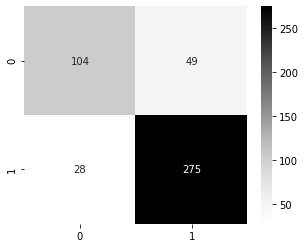

The classification report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [111]:
# Confussion matrix and report for ADA boost on test data
print('Random Forest Model (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_rf_tune)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_rf_tune))
# Obtaining the test metrics into variables
rf_tune_metrics=classification_report(y_test, ytest_predict_rf_tune, output_dict=True)
df=pd.DataFrame(rf_tune_metrics).transpose()
rf_tune_test_f1=round(df.loc["1"][2],2)
rf_tune_test_recall=round(df.loc["1"][1],2)
rf_tune_test_precision=round(df.loc["1"][0],2)
rf_tune_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 0.920
AUC (Test): 0.890


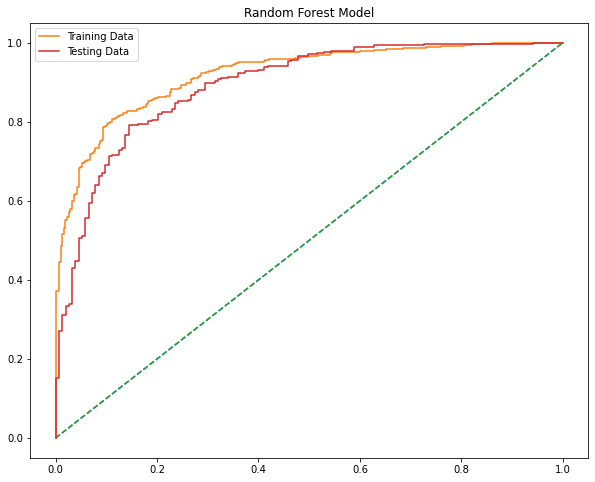

In [112]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = rf_tune.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_tune_train_auc = round(roc_auc_score(y_train, probs),2)
print('AUC (Train): %.3f' % rf_tune_train_auc)
# calculate roc curve
rf_tune_train_fpr, rf_tune_train_tpr, rf_tune_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_tune_train_fpr, rf_tune_train_tpr, label='Training Data')
plt.title('Random Forest Model')

# For test data
probs = rf_tune.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_tune_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % rf_tune_test_auc)
# calculate roc curve
rf_tune_test_fpr, rf_tune_test_tpr, rf_tune_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_tune_test_fpr, rf_tune_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

In [113]:
print('\n\n\033[1mBagging (All parameters in %)\033[0m')
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Bagging (Train)':[bag_train_acc,bag_train_auc,bag_train_recall,bag_train_precision,bag_train_f1],
                     'Random Forest_Tune (Train)':[rf_tune_train_acc,rf_tune_train_auc,rf_tune_train_recall,rf_tune_train_precision,rf_tune_train_f1],
                    'Bagging (Test)':[bag_test_acc,bag_test_auc,bag_test_recall,bag_test_precision,bag_test_f1],
                    'Random Forest_Tune (Test)':[rf_tune_test_acc,rf_tune_test_auc,rf_tune_test_recall,rf_tune_test_precision,rf_tune_test_f1]},index=index)
bagging_performance = round(data,2)*100
bagging_performance.T



Bagging (All parameters in %)


,Accuracy,AUC,Recall,Precision,F1 Score
Bagging (Train),99.0,100.0,99.0,99.0,99.0
Random Forest_Tune (Train),86.0,92.0,93.0,88.0,90.0
Bagging (Test),80.0,85.0,85.0,84.0,85.0
Random Forest_Tune (Test),83.0,89.0,91.0,85.0,88.0


-------
## Model Comparison

In [114]:
# We will consolidate all the model metrics
consolidate_models = pd.concat([logit_performance, lda_performance, knn_performance, nb_performance, boost_performance, bagging_performance], axis=1)
consolidate_models

,Logistic Regression (Train),Logistic Regression_Tune (Train),Logistic Regression (Test),Logistic Regression_Tune (Test),LDA (Train),LDA [Thresh>0.4] (Train),LDA (Test),LDA [Thresh>0.4] (Test),KNN (Test),Naive Bayes (Train),Naive Bayes (Test),ADA Boost (Train),Gradient Boost (Train),ADA Boost (Test),Gradient Boost (Test),Bagging (Train),Random Forest_Tune (Train),Bagging (Test),Random Forest_Tune (Test)
Accuracy,84.0,84.0,83.0,83.0,83.0,83.0,83.0,83.0,84.0,84.0,82.0,83.0,99.0,81.0,80.0,99.0,86.0,80.0,83.0
AUC,89.0,89.0,88.0,88.0,89.0,89.0,89.0,89.0,80.0,89.0,88.0,92.0,100.0,86.0,87.0,100.0,92.0,85.0,89.0
Recall,91.0,92.0,88.0,88.0,91.0,94.0,89.0,91.0,92.0,90.0,87.0,91.0,99.0,89.0,87.0,99.0,93.0,85.0,91.0
Precision,87.0,86.0,86.0,86.0,86.0,84.0,86.0,84.0,85.0,88.0,87.0,86.0,99.0,83.0,83.0,99.0,88.0,84.0,85.0
F1 Score,89.0,89.0,87.0,87.0,89.0,89.0,88.0,87.0,89.0,89.0,87.0,89.0,99.0,86.0,85.0,99.0,90.0,85.0,88.0


In [115]:
# For ease of analysing the metrics let us split the test and train into separate data frames
consolidate_models_train = consolidate_models[['Logistic Regression (Train)', 'Logistic Regression_Tune (Train)', 'LDA (Train)', 'LDA [Thresh>0.4] (Train)', 'Naive Bayes (Train)', 'ADA Boost (Train)', 'Gradient Boost (Train)', 'Bagging (Train)', 'Random Forest_Tune (Train)']]
consolidate_models_train.style.highlight_max(color = 'lightgreen', axis = 1)

,Logistic Regression (Train),Logistic Regression_Tune (Train),LDA (Train),LDA [Thresh>0.4] (Train),Naive Bayes (Train),ADA Boost (Train),Gradient Boost (Train),Bagging (Train),Random Forest_Tune (Train)
Accuracy,84.000000,84.000000,83.000000,83.000000,84.000000,83.000000,99.000000,99.000000,86.000000
AUC,89.000000,89.000000,89.000000,89.000000,89.000000,92.000000,100.000000,100.000000,92.000000
Recall,91.000000,92.000000,91.000000,94.000000,90.000000,91.000000,99.000000,99.000000,93.000000
Precision,87.000000,86.000000,86.000000,84.000000,88.000000,86.000000,99.000000,99.000000,88.000000
F1 Score,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,99.000000,99.000000,90.000000


In [116]:
consolidate_models_train = consolidate_models[['Logistic Regression (Test)', 'Logistic Regression_Tune (Test)', 'LDA (Test)', 'LDA [Thresh>0.4] (Test)', 'KNN (Test)', 'Naive Bayes (Test)', 'ADA Boost (Test)', 'Gradient Boost (Test)', 'Bagging (Test)', 'Random Forest_Tune (Test)']]
consolidate_models_train.style.highlight_max(color = 'lightgreen', axis = 1)

,Logistic Regression (Test),Logistic Regression_Tune (Test),LDA (Test),LDA [Thresh>0.4] (Test),KNN (Test),Naive Bayes (Test),ADA Boost (Test),Gradient Boost (Test),Bagging (Test),Random Forest_Tune (Test)
Accuracy,83.000000,83.000000,83.000000,83.000000,84.000000,82.000000,81.000000,80.000000,80.000000,83.000000
AUC,88.000000,88.000000,89.000000,89.000000,80.000000,88.000000,86.000000,87.000000,85.000000,89.000000
Recall,88.000000,88.000000,89.000000,91.000000,92.000000,87.000000,89.000000,87.000000,85.000000,91.000000
Precision,86.000000,86.000000,86.000000,84.000000,85.000000,87.000000,83.000000,83.000000,84.000000,85.000000
F1 Score,87.000000,87.000000,88.000000,87.000000,89.000000,87.000000,86.000000,85.000000,85.000000,88.000000


Upon carefully comparing the scores of all the models the following is the conclusion:
-	Gradient boosting and simple bagging models are over fitted and hence cannot be used.
-	All the other models are performing as expected for the majority class. However, for the minority class they are performing fairly okay. A few models that have performed well for both classes are with a good accuracy score are:
    - Random forest with model tunning
    - Linear Discriminant Analysis (with and without custom threshold)
    
Since these have a very good performance in the majority class and a fairly satisfactory performance in the minority class we will try to address the class imbalance and then see if the performance improves.

-------

## Class imbalance (SMOTE)

In [117]:
# Testing for class ratio post splitting in the train set
print('Class ratio in the train set:\n',y_train.value_counts())

Class ratio in the train set:
 1    754
0    307
Name: vote_Labour, dtype: int64


We will apply SMOTE on the training data set only

In [118]:
# Applying SMOTE on the training
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [119]:
# Testing for class ratio post splitting in the train set
print('Class ratio in the train set:\n',y_train.value_counts())

Class ratio in the train set:
 1    754
0    307
Name: vote_Labour, dtype: int64


In [120]:
# Obtaining the value counts to check if the data is over sampled correctly
pd.Series(y_train_res).value_counts()

1    754
0    754
dtype: int64

In [121]:
# Applying SMOTE on the scalled training
sm = SMOTE(random_state=1)
X_train_reg_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [122]:
# Obtaining the shape of the X_train and scalled X_train after oversampling
X_train_res.shape, X_train_reg_res.shape

((1508, 8), (1508, 8))

-----
## Model Building (After over sampling)

### Logistic Regression
**No hyper Parameters**

In [123]:
# Creating an instance of the model
logit = LogisticRegression()

# Training the model with the train data
logit.fit(X_train_res, y_train_res)

LogisticRegression()

In [124]:
# Prediction on the training set
ytrain_predict_logit = logit.predict(X_train_res)

# Prediction on the testing set
ytest_predict_logit = logit.predict(X_test)

Feature importance for logistic regression:
Feature: age, Score: -0.01080
Feature: economic_cond_national, Score: 0.83235
Feature: economic_cond_household, Score: 0.17854
Feature: blair, Score: 0.83727
Feature: hague, Score: -0.85714
Feature: europe, Score: -0.18143
Feature: political_knowledge, Score: -0.21987
Feature: gender_male, Score: 0.62964


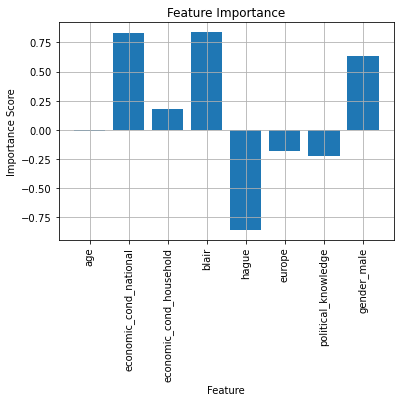

In [125]:
# Feature importance for logistic regression
print('Feature importance for logistic regression:')
importance = logit.coef_[0]
# Summarize feature importance
for i,v in enumerate(importance):
        print('Feature: %0s, Score: %.5f' % (election.drop('vote_Labour', axis=1).columns[i],v))
# Plot feature importance
plt.bar([x for x in (election.drop('vote_Labour', axis=1).columns)], importance)
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.grid()
plt.show()

Logistic Regression Model (Train Data):
Confusion Matrix:


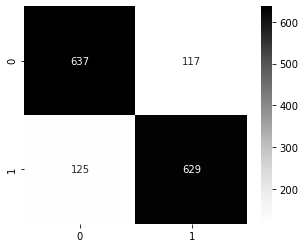

The classification report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       754
           1       0.84      0.83      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [126]:
# Confussion matrix and report for logistic regression and train data
print('Logistic Regression Model (Train Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train_res, ytrain_predict_logit)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train_res, ytrain_predict_logit))
# Obtaining the train metrics into variables
logit_metrics=classification_report(y_train_res, ytrain_predict_logit, output_dict=True)
df=pd.DataFrame(logit_metrics).transpose()
logit_train_f1=round(df.loc["1"][2],2)
logit_train_recall=round(df.loc["1"][1],2)
logit_train_precision=round(df.loc["1"][0],2)
logit_train_acc=round(df.loc["accuracy"][2],2)

Logistic Regression Model (Test Data):
Confusion Matrix:


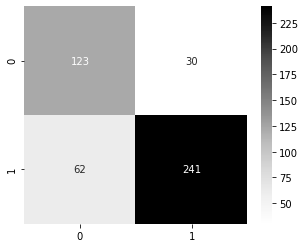

The classification report:
              precision    recall  f1-score   support

           0       0.66      0.80      0.73       153
           1       0.89      0.80      0.84       303

    accuracy                           0.80       456
   macro avg       0.78      0.80      0.78       456
weighted avg       0.81      0.80      0.80       456



In [127]:
# Confussion matrix and report for logistic regression and test data
print('Logistic Regression Model (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_logit)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_logit))
# Obtaining the test metrics into variables
logit_metrics=classification_report(y_test, ytest_predict_logit, output_dict=True)
df=pd.DataFrame(logit_metrics).transpose()
logit_test_f1=round(df.loc["1"][2],2)
logit_test_recall=round(df.loc["1"][1],2)
logit_test_precision=round(df.loc["1"][0],2)
logit_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 0.910
AUC (Test): 0.870


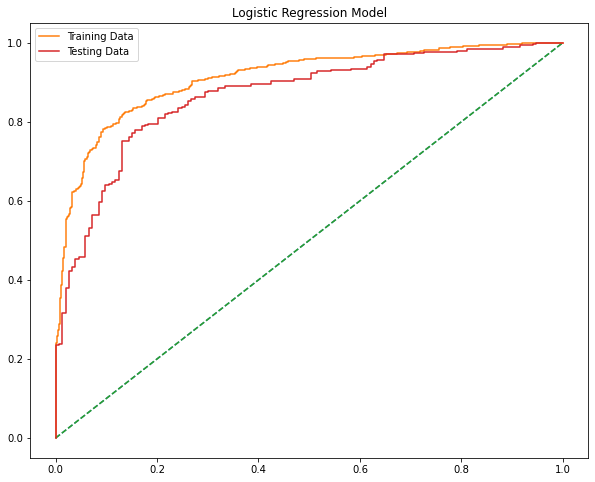

In [128]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = logit.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_train_auc = round(roc_auc_score(y_train_res, probs),2)
print('AUC (Train): %.3f' % logit_train_auc)
# calculate roc curve
logit_train_fpr, logit_train_tpr, logit_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_train_fpr, logit_train_tpr, label='Training Data')
plt.title('Logistic Regression Model')

# For test data
probs = logit.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % logit_test_auc)
# calculate roc curve
logit_test_fpr, logit_test_tpr, logit_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_test_fpr, logit_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

**GridSearchCV**

In [129]:
# Initializing parameters
param_grid_logit = {'max_iter': [12, 25, 50, 100],
                         'penalty': ['15', 'l2', '6'],
                         'solver': ['saga', 'sag', 'lbfgs', 'newton-cg', 'liblinear'],
                         'tol': [0.0001, 0.00001, 0.000001]}

In [130]:
# Initialting the grid search
grid_search_logit = GridSearchCV(estimator = logit, param_grid = param_grid_logit, cv = 3,n_jobs=-1,scoring='f1')

In [131]:
# Fitting the train data 
grid_search_logit.fit(X_train_res, y_train_res)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [12, 25, 50, 100],
                         'penalty': ['15', 'l2', '6'],
                         'solver': ['saga', 'sag', 'lbfgs', 'newton-cg',
                                    'liblinear'],
                         'tol': [0.0001, 1e-05, 1e-06]},
             scoring='f1')

In [132]:
# Obtaining the best hyper parameters
print(grid_search_logit.best_params_)

{'max_iter': 25, 'penalty': 'l2', 'solver': 'sag', 'tol': 1e-05}


In [133]:
logit_tune = grid_search_logit.best_estimator_

In [134]:
# Prediction on the training set
ytrain_predict_logit_tune = logit_tune.predict(X_train_res)

# Prediction on the testing set
ytest_predict_logit_tune = logit_tune.predict(X_test)

Feature importance for logistic regression (Post tunning):
Feature: age, Score: -0.01452
Feature: economic_cond_national, Score: 0.62604
Feature: economic_cond_household, Score: 0.21027
Feature: blair, Score: 0.79524
Feature: hague, Score: -0.84783
Feature: europe, Score: -0.19573
Feature: political_knowledge, Score: -0.20013
Feature: gender_male, Score: 0.29061


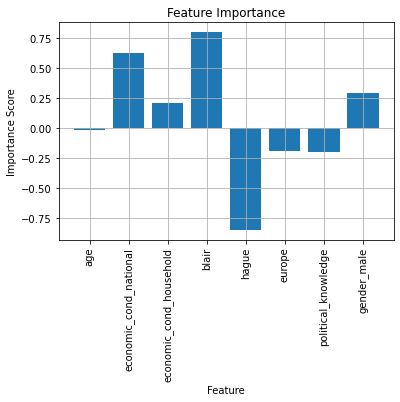

In [135]:
# Feature importance for logistic regression
print('Feature importance for logistic regression (Post tunning):')
importance = logit_tune.coef_[0]
# Summarize feature importance
for i,v in enumerate(importance):
        print('Feature: %0s, Score: %.5f' % (election.drop('vote_Labour', axis=1).columns[i],v))
# Plot feature importance
plt.bar([x for x in (election.drop('vote_Labour', axis=1).columns)], importance)
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.grid()
plt.show()

Logistic Regression Model [Post tunning] (Train Data):
Confusion Matrix:


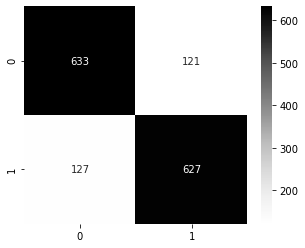

The classification report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       754
           1       0.84      0.83      0.83       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [136]:
# Confussion matrix and report for logistic regression (Post tunning) and train data
print('Logistic Regression Model [Post tunning] (Train Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train_res, ytrain_predict_logit_tune)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train_res, ytrain_predict_logit_tune))
# Obtaining the train metrics into variables
logit_tune_metrics=classification_report(y_train_res, ytrain_predict_logit_tune, output_dict=True)
df=pd.DataFrame(logit_tune_metrics).transpose()
logit_tune_train_f1=round(df.loc["1"][2],2)
logit_tune_train_recall=round(df.loc["1"][1],2)
logit_tune_train_precision=round(df.loc["1"][0],2)
logit_tune_train_acc=round(df.loc["accuracy"][2],2)

Logistic Regression Model [Post tunning] (Test Data):
Confusion Matrix:


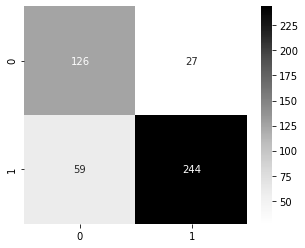

The classification report:
              precision    recall  f1-score   support

           0       0.68      0.82      0.75       153
           1       0.90      0.81      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.80       456
weighted avg       0.83      0.81      0.82       456



In [137]:
# Confussion matrix and report for logistic regression and test data
print('Logistic Regression Model [Post tunning] (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_logit_tune)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_logit_tune))
# Obtaining the test metrics into variables
logit_tune_metrics=classification_report(y_test, ytest_predict_logit_tune, output_dict=True)
df=pd.DataFrame(logit_tune_metrics).transpose()
logit_tune_test_f1=round(df.loc["1"][2],2)
logit_tune_test_recall=round(df.loc["1"][1],2)
logit_tune_test_precision=round(df.loc["1"][0],2)
logit_tune_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 0.910
AUC (Test): 0.880


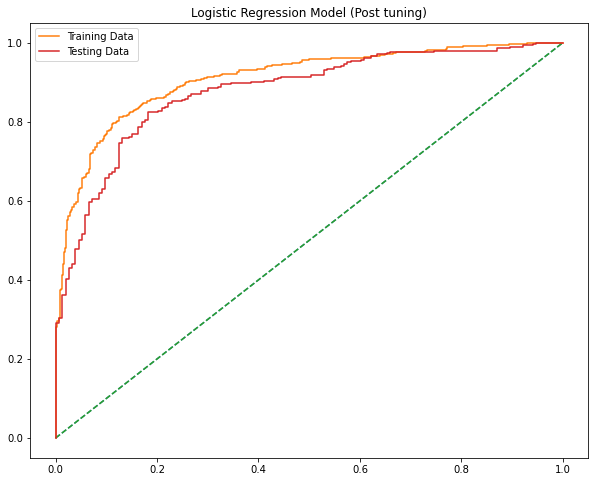

In [138]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = logit_tune.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_tune_train_auc = round(roc_auc_score(y_train_res, probs),2)
print('AUC (Train): %.3f' % logit_tune_train_auc)
# calculate roc curve
logit_train_fpr, logit_train_tpr, logit_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_train_fpr, logit_train_tpr, label='Training Data')
plt.title('Logistic Regression Model (Post tuning)')

# For test data
probs = logit_tune.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logit_tune_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % logit_tune_test_auc)
# calculate roc curve
logit_tune_test_fpr, logit_tune_test_tpr, logit_tune_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logit_tune_test_fpr, logit_tune_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

In [139]:
print('\n\n\033[1mLogistic Regression (All parameters in %)\033[0m')
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Regression (Train)':[logit_train_acc,logit_train_auc,logit_train_recall,logit_train_precision,logit_train_f1],
                     'Logistic Regression_Tune (Train)':[logit_tune_train_acc,logit_tune_train_auc,logit_tune_train_recall,logit_tune_train_precision,logit_tune_train_f1],
                    'Logistic Regression (Test)':[logit_test_acc,logit_test_auc,logit_test_recall,logit_test_precision,logit_test_f1],
                    'Logistic Regression_Tune (Test)':[logit_tune_test_acc,logit_tune_test_auc,logit_tune_test_recall,logit_tune_test_precision,logit_tune_test_f1]},index=index)
logit_performance = round(data,2)*100
logit_performance.T



Logistic Regression (All parameters in %)


,Accuracy,AUC,Recall,Precision,F1 Score
Logistic Regression (Train),84.0,91.0,83.0,84.0,84.0
Logistic Regression_Tune (Train),84.0,91.0,83.0,84.0,83.0
Logistic Regression (Test),80.0,87.0,80.0,89.0,84.0
Logistic Regression_Tune (Test),81.0,88.0,81.0,90.0,85.0


### Linear Discriminant Analysis
**Max likelihood is the default (0.5)**

In [140]:
# Creating an instance of the model
lda = LinearDiscriminantAnalysis()

# Training the model with the train data
lda.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [141]:
# Prediction on the training set
ytrain_predict_lda = lda.predict(X_train_res)

# Prediction on the testing set
ytest_predict_lda = lda.predict(X_test)

Feature importance for LDA:
Feature: age, Score: -0.01798
Feature: economic_cond_national, Score: 0.81675
Feature: economic_cond_household, Score: 0.19509
Feature: blair, Score: 0.97705
Feature: hague, Score: -0.97391
Feature: europe, Score: -0.18896
Feature: political_knowledge, Score: -0.28751
Feature: gender_male, Score: 0.68831


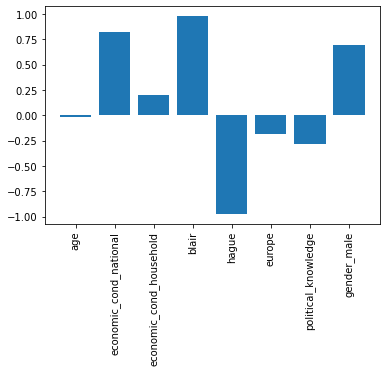

In [142]:
# Feature importance for logistic regression
print('Feature importance for LDA:')
importance = lda.coef_[0]
# Summarize feature importance
for i,v in enumerate(importance):
        print('Feature: %0s, Score: %.5f' % (election.drop('vote_Labour', axis=1).columns[i],v))
# Plot feature importance
plt.bar([x for x in (election.drop('vote_Labour', axis=1).columns)], importance)
plt.xticks(rotation=90)
plt.show()

LDA Model (Train Data):
Confusion Matrix:


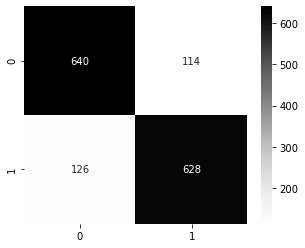

The classification report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       754
           1       0.85      0.83      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [143]:
# Confussion matrix and report for LDA on train data
print('LDA Model (Train Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train_res, ytrain_predict_lda)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train_res, ytrain_predict_lda))
# Obtaining the train metrics into variables
lda_metrics=classification_report(y_train_res, ytrain_predict_lda, output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
lda_train_acc=round(df.loc["accuracy"][2],2)

LDA Model (Test Data):
Confusion Matrix:


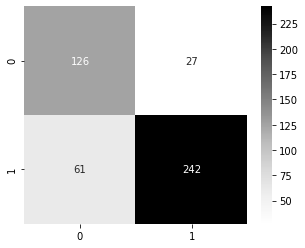

The classification report:
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       153
           1       0.90      0.80      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.79       456
weighted avg       0.82      0.81      0.81       456



In [144]:
# Confussion matrix and report for LDA on test data
print('LDA Model (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_lda)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_lda))
# Obtaining the test metrics into variables
lda_metrics=classification_report(y_test, ytest_predict_lda, output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
lda_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 0.910
AUC (Test): 0.870


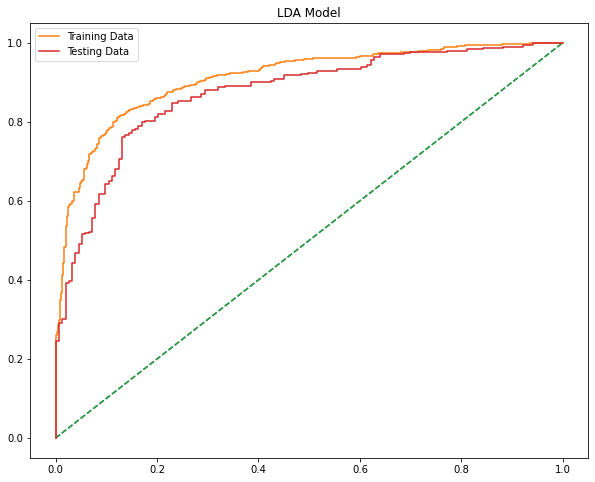

In [145]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = lda.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = round(roc_auc_score(y_train_res, probs),2)
print('AUC (Train): %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, label='Training Data')
plt.title('LDA Model')

# For test data
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

**Custom threshold/max likelihood**

In [146]:
# Obtaining the probability of the prediction for train and test data
pred_prob_train = lda.predict_proba(X_train_res)
pred_prob_test = lda.predict_proba(X_test)

When the cut-off probability is 0.30
Accuracy: 0.806
F1-Score: 0.823
Confussion Matrix:


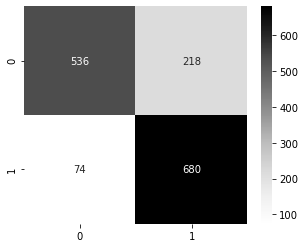

---------------------------------------------------------------


When the cut-off probability is 0.40
Accuracy: 0.826
F1-Score: 0.833
Confussion Matrix:


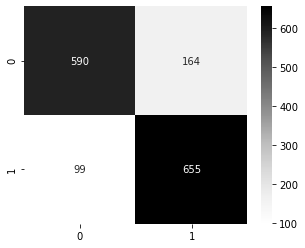

---------------------------------------------------------------


When the cut-off probability is 0.50
Accuracy: 0.841
F1-Score: 0.840
Confussion Matrix:


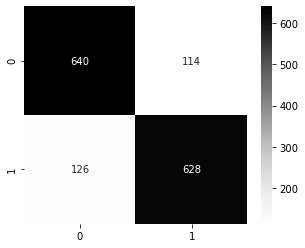

---------------------------------------------------------------


When the cut-off probability is 0.60
Accuracy: 0.838
F1-Score: 0.828
Confussion Matrix:


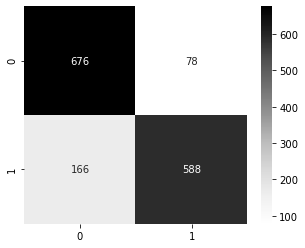

---------------------------------------------------------------


When the cut-off probability is 0.70
Accuracy: 0.825
F1-Score: 0.806
Confussion Matrix:


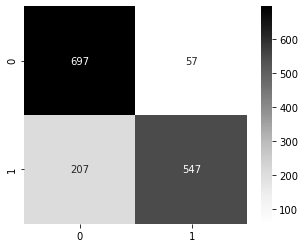

---------------------------------------------------------------


When the cut-off probability is 0.80
Accuracy: 0.792
F1-Score: 0.753
Confussion Matrix:


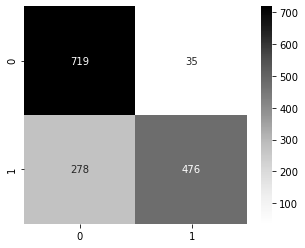

---------------------------------------------------------------


When the cut-off probability is 0.90
Accuracy: 0.733
F1-Score: 0.645
Confussion Matrix:


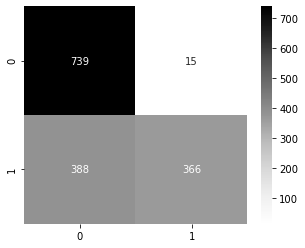

---------------------------------------------------------------




In [147]:
# We will perform the classification with the probability for various values of threshold
# We will then find the accuracy and F1 score for the different values
acc_mat=[]
f1_mat=[]
for j in np.arange(0.3, 1, 0.1):
    custom_prob = j # Defining the new cut off value of our choice
    custom_cutoff_data = [] # Initiating an empty list that will be used to store the dependent variables class
    for i in range(0, len(y_train_res)):
        if np.array(pred_prob_train[:,1][i]>custom_prob):
            a = 1 # If probability is greater than the cut off then 1
        else:
            a = 0 # If probability is lesser than the cut off then 0
        custom_cutoff_data.append(a) # Appending the class to the list of outputs
    
    # Displaying the confusion matrix along with the accuracy and F1 score for each case
    print('When the cut-off probability is %0.2f' %j)
    print('Accuracy: %0.3f'%(metrics.accuracy_score(y_train_res, custom_cutoff_data)))
    print('F1-Score: %0.3f'%(metrics.f1_score(y_train_res, custom_cutoff_data)))  
    acc_mat.append(metrics.accuracy_score(y_train_res, custom_cutoff_data))
    f1_mat.append(metrics.f1_score(y_train_res, custom_cutoff_data))
    print('Confussion Matrix:')
    plt.figure(figsize=(5,4))
    sns.heatmap((metrics.confusion_matrix(y_train_res, custom_cutoff_data)), annot=True, cmap='Greys', fmt='0.4g')
    plt.show()
    print('---------------------------------------------------------------\n\n')

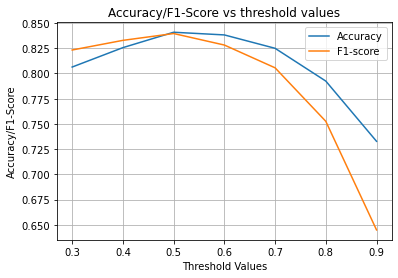

In [148]:
# Plotting the various values of accuracy and f1 values
plt.plot(np.arange(0.3, 1, 0.1), acc_mat, label='Accuracy')
plt.plot(np.arange(0.3, 1, 0.1), f1_mat, label='F1-score' )
plt.title('Accuracy/F1-Score vs threshold values')
plt.xlabel('Threshold Values')
plt.ylabel('Accuracy/F1-Score')
plt.legend(loc='best')
plt.grid()
plt.show()

LDA Model Custom Cut-off=0.5 (Train Data):
When the cut-off probability is 0.5
Confusion Matrix:


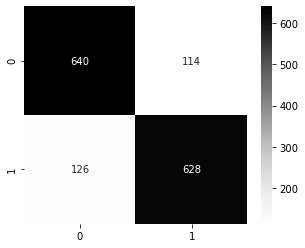

The classification report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       754
           1       0.85      0.83      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [149]:
# For the cut-off of 0.5

# Train data
custom_prob = 0.5
print('LDA Model Custom Cut-off={} (Train Data):'.format(custom_prob))
custom_cutoff_data_train = []
for i in range(0, len(y_train_res)):
    if np.array(pred_prob_train[:,1][i]>custom_prob):
        a = 1 # If probability is greater than the cut off then 1
    else:
        a = 0 # If probability is lesser than the cut off then 0
    custom_cutoff_data_train.append(a) # Appending the class to the list of outputs

# Displaying the confusion matrix along with the accuracy and F1 score for each case
print('When the cut-off probability is %0.1f' %custom_prob)
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train_res, custom_cutoff_data_train)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train_res, custom_cutoff_data_train))

LDA Model Custom Cut-off=0.5 (Test Data):
When the cut-off probability is 0.5
Confusion Matrix:


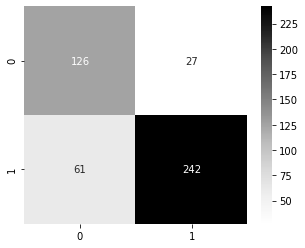

The classification report:
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       153
           1       0.90      0.80      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.79       456
weighted avg       0.82      0.81      0.81       456



In [150]:
# Test data
custom_prob = 0.5
print('LDA Model Custom Cut-off={} (Test Data):'.format(custom_prob))
custom_cutoff_data_test = []
for i in range(0, len(y_test)):
    if np.array(pred_prob_test[:,1][i]>custom_prob):
        a = 1 # If probability is greater than the cut off then 1
    else:
        a = 0 # If probability is lesser than the cut off then 0
    custom_cutoff_data_test.append(a) # Appending the class to the list of outputs

# Displaying the confusion matrix along with the accuracy and F1 score for each case
print('When the cut-off probability is %0.1f' %custom_prob)  
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, custom_cutoff_data_test)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, custom_cutoff_data_test))

In [151]:
# Obtaining the train metrics into variables
lda_metrics=classification_report(y_train_res, custom_cutoff_data_train, output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
ldacust_train_f1=round(df.loc["1"][2],2)
ldacust_train_recall=round(df.loc["1"][1],2)
ldacust_train_precision=round(df.loc["1"][0],2)
ldacust_train_acc=round(df.loc["accuracy"][2],2)

In [152]:
# Obtaining the test metrics into variables
lda_metrics=classification_report(y_test, custom_cutoff_data_test, output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
ldacust_test_f1=round(df.loc["1"][2],2)
ldacust_test_recall=round(df.loc["1"][1],2)
ldacust_test_precision=round(df.loc["1"][0],2)
ldacust_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 0.910
AUC (Test): 0.870


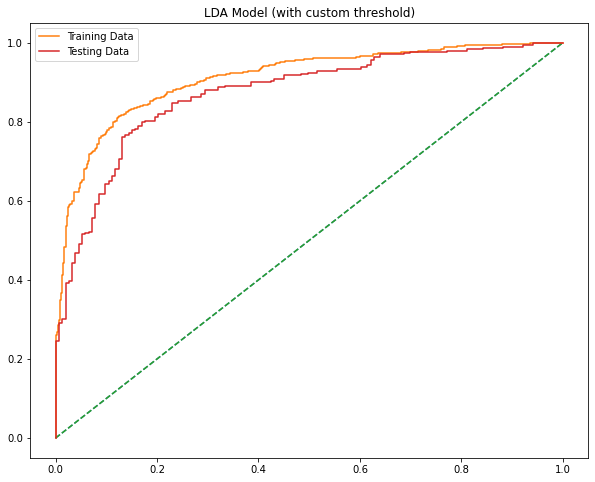

In [153]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = lda.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ldacust_train_auc = round(roc_auc_score(y_train_res, probs),2)
print('AUC (Train): %.3f' % ldacust_train_auc)
# calculate roc curve
ldacust_train_fpr, ldacust_train_tpr, ldacust_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ldacust_train_fpr, ldacust_train_tpr, label='Training Data')
plt.title('LDA Model (with custom threshold)')

# For test data
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ldacust_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % ldacust_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

In [154]:
print('\n\n\033[1mLDA (All parameters in %)\033[0m')
data = pd.DataFrame({'LDA (Train)':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
                     'LDA [Thresh>0.4] (Train)':[ldacust_train_acc,ldacust_train_auc,ldacust_train_recall,ldacust_train_precision,ldacust_train_f1],
                    'LDA (Test)':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
                    'LDA [Thresh>0.4] (Test)':[ldacust_test_acc,ldacust_test_auc,ldacust_test_recall,ldacust_test_precision,ldacust_test_f1]},index=index)
lda_performance = round(data,2)*100
lda_performance.T



LDA (All parameters in %)


,Accuracy,AUC,Recall,Precision,F1 Score
LDA (Train),84.0,91.0,83.0,85.0,84.0
LDA [Thresh>0.4] (Train),84.0,91.0,83.0,85.0,84.0
LDA (Test),81.0,87.0,80.0,90.0,85.0
LDA [Thresh>0.4] (Test),81.0,87.0,80.0,90.0,85.0


### K Nearest Neighbors

In [155]:
# To find the square root of the number of observations (thumb rule)
round(np.sqrt(election.shape[0]))

39

As a ball park number, based on the thumb rule of chosing k for 2 class classification, we get 39. Let us compute the scores of the model for a range of k values to find the best value for k.

In [156]:
# Initializing an empty list
score = []

# Initializing a for loop to run the KNN model for various values of k
for i in range(25,35):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance') # Creating an instance of the model
    knn.fit(X_train_reg_res, y_train_res) # Training the model
    score.append(knn.score(X_test_reg, y_test)) # Appending the computed score to a list

Text(0, 0.5, 'Scores')

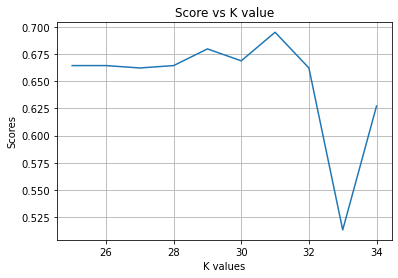

In [157]:
# Plotting the score correspoding to various values of k
plt.plot(range(25,35), score)
plt.grid()
plt.title('Score vs K value')
plt.xlabel('K values')
plt.ylabel('Scores')

From the above graph we can infer that a k value of 25 will give the maximum score

In [158]:
# Initializing a mode for k=31
knn = KNeighborsClassifier(n_neighbors=31, weights='distance')

# Training the model
knn.fit(X_train_reg_res, y_train_res)

KNeighborsClassifier(n_neighbors=31, weights='distance')

In [159]:
# Obtaining the score for the test data
knn.score(X_test_reg, y_test)

0.6951754385964912

In [160]:
# Predicting the labels
ytest_predict_knn = knn.predict(X_test_reg)

KNN Model (Test Data):
Confusion Matrix:


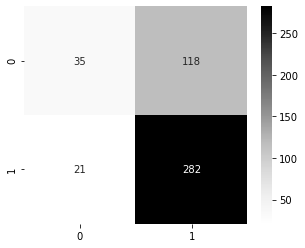

The classification report:
              precision    recall  f1-score   support

           0       0.62      0.23      0.33       153
           1       0.70      0.93      0.80       303

    accuracy                           0.70       456
   macro avg       0.67      0.58      0.57       456
weighted avg       0.68      0.70      0.65       456



In [161]:
# Confussion matrix and report for logistic regression and test data
print('KNN Model (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_knn)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_knn))
# Obtaining the test metrics into variables
lda_metrics=classification_report(y_test, ytest_predict_knn, output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
lda_test_acc=round(df.loc["accuracy"][2],2)

In [162]:
# Obtaining the test metrics into variables
knn_metrics=classification_report(y_test, ytest_predict_knn, output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_test_f1=round(df.loc["1"][2],2)
knn_test_recall=round(df.loc["1"][1],2)
knn_test_precision=round(df.loc["1"][0],2)
knn_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 1.000
AUC (Test): 0.870


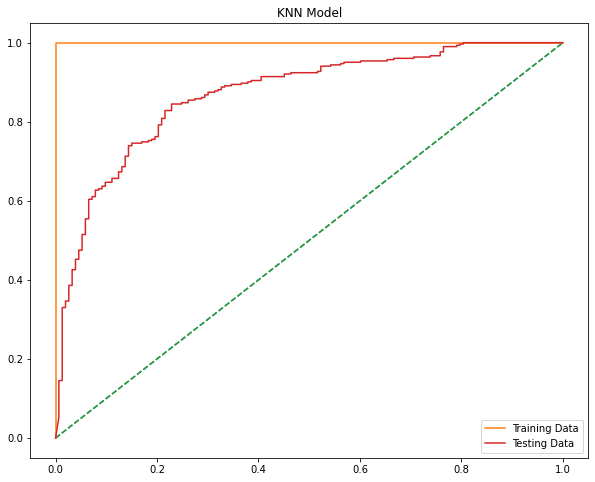

In [163]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = knn.predict_proba(X_train_reg_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = round(roc_auc_score(y_train_res, probs),2)
print('AUC (Train): %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr, label='Training Data')
plt.title('KNN Model')

# For test data
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

In [164]:
print('\n\n\033[1mKNN (All parameters in %)\033[0m')
data = pd.DataFrame({'KNN (Test)':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1]},index=index)
knn_performance = round(data,2)*100
knn_performance.T



KNN (All parameters in %)


,Accuracy,AUC,Recall,Precision,F1 Score
KNN (Test),70.0,87.0,93.0,70.0,80.0


### Naive Bayes

In [165]:
# Creating an instance of the model
nb = GaussianNB()

# Training the model with the train data
nb.fit(X_train_res,y_train_res)

GaussianNB()

In [166]:
# Prediction on the training set
ytrain_predict_nb = nb.predict(X_train_res)

# Prediction on the testing set
ytest_predict_nb = nb.predict(X_test)

Naive Bayes Model (Train Data):
Confusion Matrix:


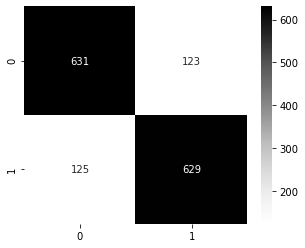

The classification report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       754
           1       0.84      0.83      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [167]:
# Confussion matrix and report for naive bayes on train data
print('Naive Bayes Model (Train Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train_res, ytrain_predict_nb)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train_res, ytrain_predict_nb))
# Obtaining the train metrics into variables
nb_metrics=classification_report(y_train_res, ytrain_predict_nb, output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_train_f1=round(df.loc["1"][2],2)
nb_train_recall=round(df.loc["1"][1],2)
nb_train_precision=round(df.loc["1"][0],2)
nb_train_acc=round(df.loc["accuracy"][2],2)

Naive Bayes Model (Test Data):
Confusion Matrix:


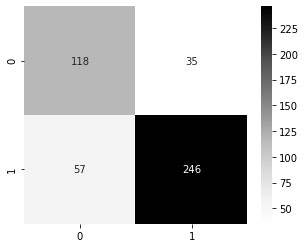

The classification report:
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       153
           1       0.88      0.81      0.84       303

    accuracy                           0.80       456
   macro avg       0.77      0.79      0.78       456
weighted avg       0.81      0.80      0.80       456



In [168]:
# Confussion matrix and report for naive bayes on test data
print('Naive Bayes Model (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_nb)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_nb))
# Obtaining the train metrics into variables
nb_metrics=classification_report(y_test, ytest_predict_nb, output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_test_f1=round(df.loc["1"][2],2)
nb_test_recall=round(df.loc["1"][1],2)
nb_test_precision=round(df.loc["1"][0],2)
nb_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 0.910
AUC (Test): 0.860


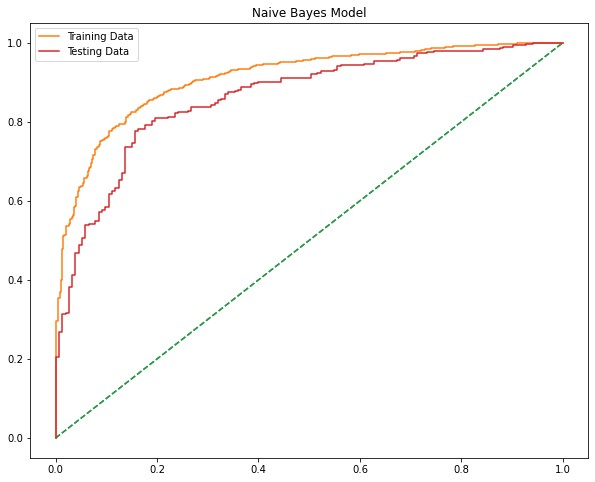

In [169]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = nb.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_train_auc = round(roc_auc_score(y_train_res, probs),2)
print('AUC (Train): %.3f' % nb_train_auc)
# calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr, label='Training Data')
plt.title('Naive Bayes Model')

# For test data
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % nb_test_auc)
# calculate roc curve
nb_test_fpr, nb_test_tpr, nb_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

In [170]:
print('\n\n\033[1mNaive Bayes (All parameters in %)\033[0m')
data = pd.DataFrame({'Naive Bayes (Train)':[nb_train_acc,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
                     'Naive Bayes (Test)':[nb_test_acc,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1]},index=index)
nb_performance = round(data,2)*100
nb_performance.T



Naive Bayes (All parameters in %)


,Accuracy,AUC,Recall,Precision,F1 Score
Naive Bayes (Train),84.0,91.0,83.0,84.0,84.0
Naive Bayes (Test),80.0,86.0,81.0,88.0,84.0


### Boosting
**ADA Boost**

In [171]:
# Creating an instance of the model
ada = AdaBoostClassifier(n_estimators=5000, random_state=1)

# Training the model with the train data 
ada.fit(X_train_res, y_train_res)

AdaBoostClassifier(n_estimators=5000, random_state=1)

In [172]:
# Prediction on the training set
ytrain_predict_ada = ada.predict(X_train_res)

# Prediction on the testing set
ytest_predict_ada = ada.predict(X_test)

ADA Boost Model (Train Data):
Confusion Matrix:


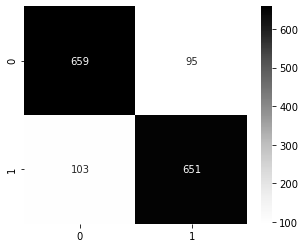

The classification report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       754
           1       0.87      0.86      0.87       754

    accuracy                           0.87      1508
   macro avg       0.87      0.87      0.87      1508
weighted avg       0.87      0.87      0.87      1508



In [173]:
# Confussion matrix and report for ADA Boost on train data
print('ADA Boost Model (Train Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train_res, ytrain_predict_ada)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train_res, ytrain_predict_ada))
# Obtaining the train metrics into variables
ada_metrics=classification_report(y_train_res, ytrain_predict_lda, output_dict=True)
df=pd.DataFrame(ada_metrics).transpose()
ada_train_f1=round(df.loc["1"][2],2)
ada_train_recall=round(df.loc["1"][1],2)
ada_train_precision=round(df.loc["1"][0],2)
ada_train_acc=round(df.loc["accuracy"][2],2)

ADA Boost Model (Test Data):
Confusion Matrix:


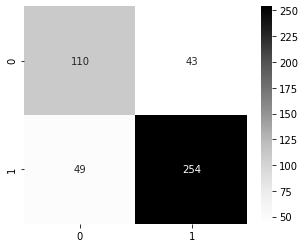

The classification report:
              precision    recall  f1-score   support

           0       0.69      0.72      0.71       153
           1       0.86      0.84      0.85       303

    accuracy                           0.80       456
   macro avg       0.77      0.78      0.78       456
weighted avg       0.80      0.80      0.80       456



In [174]:
# Confussion matrix and report for ADA boost on test data
print('ADA Boost Model (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_ada)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_ada))
# Obtaining the test metrics into variables
ada_metrics=classification_report(y_test, ytest_predict_ada, output_dict=True)
df=pd.DataFrame(ada_metrics).transpose()
ada_test_f1=round(df.loc["1"][2],2)
ada_test_recall=round(df.loc["1"][1],2)
ada_test_precision=round(df.loc["1"][0],2)
ada_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 0.940
AUC (Test): 0.860


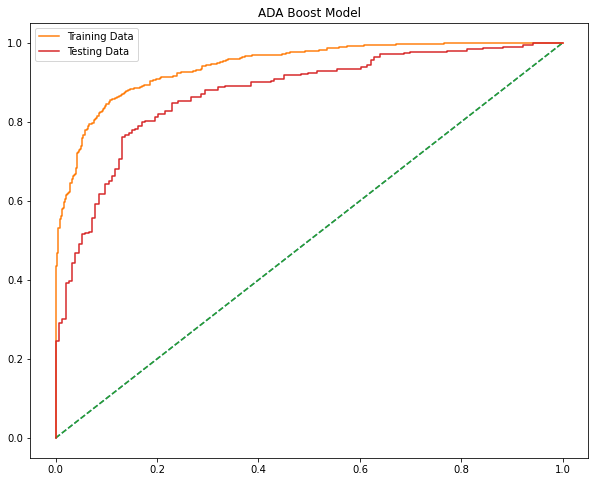

In [175]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = ada.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_train_auc = round(roc_auc_score(y_train_res, probs),2)
print('AUC (Train): %.3f' % ada_train_auc)
# calculate roc curve
ada_train_fpr, ada_train_tpr, ada_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ada_train_fpr, ada_train_tpr, label='Training Data')
plt.title('ADA Boost Model')

# For test data
probs = ada.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ada_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % ada_test_auc)
# calculate roc curve
ada_test_fpr, ada_test_tpr, ada_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

**Gradient Boost**

In [176]:
# Creating an instance of the model
grad = GradientBoostingClassifier(n_estimators=1000, random_state=1)

# Training the model with the train data 
grad.fit(X_train_res, y_train_res)

GradientBoostingClassifier(n_estimators=1000, random_state=1)

In [177]:
# Prediction on the training set
ytrain_predict_grad = grad.predict(X_train_res)

# Prediction on the testing set
ytest_predict_grad = grad.predict(X_test)

Gradient Boost Model (Train Data):
Confusion Matrix:


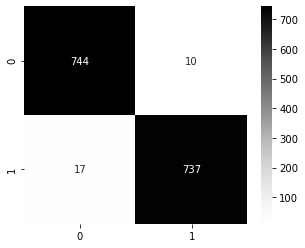

The classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       754
           1       0.99      0.98      0.98       754

    accuracy                           0.98      1508
   macro avg       0.98      0.98      0.98      1508
weighted avg       0.98      0.98      0.98      1508



In [178]:
# Confussion matrix and report for ADA Boost on train data
print('Gradient Boost Model (Train Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train_res, ytrain_predict_grad)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train_res, ytrain_predict_grad))
# Obtaining the train metrics into variables
grad_metrics=classification_report(y_train_res, ytrain_predict_grad, output_dict=True)
df=pd.DataFrame(grad_metrics).transpose()
grad_train_f1=round(df.loc["1"][2],2)
grad_train_recall=round(df.loc["1"][1],2)
grad_train_precision=round(df.loc["1"][0],2)
grad_train_acc=round(df.loc["accuracy"][2],2)

Gradient Boost Model (Test Data):
Confusion Matrix:


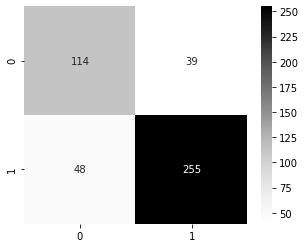

The classification report:
              precision    recall  f1-score   support

           0       0.70      0.75      0.72       153
           1       0.87      0.84      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.79      0.79       456
weighted avg       0.81      0.81      0.81       456



In [179]:
# Confussion matrix and report for ADA boost on test data
print('Gradient Boost Model (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_grad)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_grad))
# Obtaining the test metrics into variables
grad_metrics=classification_report(y_test, ytest_predict_grad, output_dict=True)
df=pd.DataFrame(grad_metrics).transpose()
grad_test_f1=round(df.loc["1"][2],2)
grad_test_recall=round(df.loc["1"][1],2)
grad_test_precision=round(df.loc["1"][0],2)
grad_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 1.000
AUC (Test): 0.880


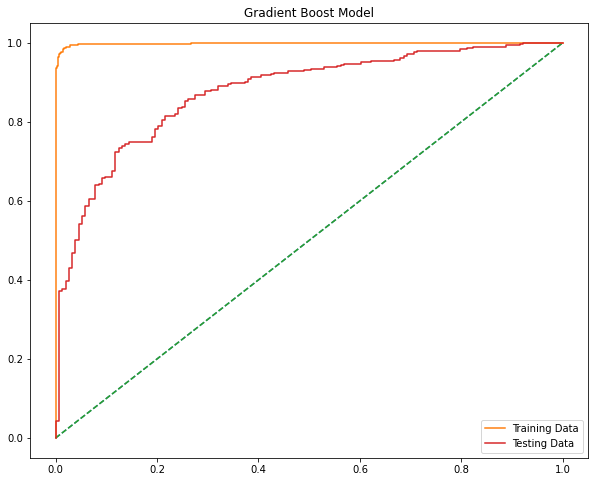

In [180]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = grad.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
grad_train_auc = round(roc_auc_score(y_train_res, probs),2)
print('AUC (Train): %.3f' % grad_train_auc)
# calculate roc curve
grad_train_fpr, grad_train_tpr, grad_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(grad_train_fpr, grad_train_tpr, label='Training Data')
plt.title('Gradient Boost Model')

# For test data
probs = grad.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
grad_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % grad_test_auc)
# calculate roc curve
grad_test_fpr, grad_test_tpr, grad_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(grad_test_fpr, grad_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

In [181]:
print('\n\n\033[1mBoosting (All parameters in %)\033[0m')
data = pd.DataFrame({'ADA Boost (Train)':[ada_train_acc,ada_train_auc,ada_train_recall,ada_train_precision,ada_train_f1],
                     'Gradient Boost (Train)':[grad_train_acc,grad_train_auc,grad_train_recall,grad_train_precision,grad_train_f1],
                    'ADA Boost (Test)':[ada_test_acc,ada_test_auc,ada_test_recall,ada_test_precision,ada_test_f1],
                    'Gradient Boost (Test)':[grad_test_acc,grad_test_auc,grad_test_recall,grad_test_precision,grad_test_f1]},index=index)
boost_performance = round(data,2)*100
boost_performance.T



Boosting (All parameters in %)


,Accuracy,AUC,Recall,Precision,F1 Score
ADA Boost (Train),84.0,94.0,83.0,85.0,84.0
Gradient Boost (Train),98.0,100.0,98.0,99.0,98.0
ADA Boost (Test),80.0,86.0,84.0,86.0,85.0
Gradient Boost (Test),81.0,88.0,84.0,87.0,85.0


### Bagging
**Normal Bagging**

In [182]:
# Creating an instance of the model
bag = BaggingClassifier(random_state=1)

# Training the model with the train data
bag.fit(X_train_res,y_train_res)

BaggingClassifier(random_state=1)

In [183]:
# Prediction on the training set
ytrain_predict_bag = bag.predict(X_train_res)

# Prediction on the testing set
ytest_predict_bag = bag.predict(X_test)

Bagging Model (Train Data):
Confusion Matrix:


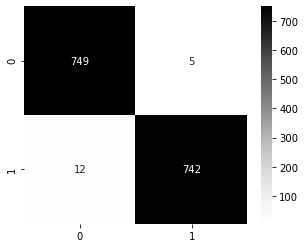

The classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       754
           1       0.99      0.98      0.99       754

    accuracy                           0.99      1508
   macro avg       0.99      0.99      0.99      1508
weighted avg       0.99      0.99      0.99      1508



In [184]:
# Confussion matrix and report for ADA Boost on train data
print('Bagging Model (Train Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train_res, ytrain_predict_bag)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train_res, ytrain_predict_bag))
# Obtaining the train metrics into variables
bag_metrics=classification_report(y_train_res, ytrain_predict_bag, output_dict=True)
df=pd.DataFrame(bag_metrics).transpose()
bag_train_f1=round(df.loc["1"][2],2)
bag_train_recall=round(df.loc["1"][1],2)
bag_train_precision=round(df.loc["1"][0],2)
bag_train_acc=round(df.loc["accuracy"][2],2)

Bagging Model (Test Data):
Confusion Matrix:


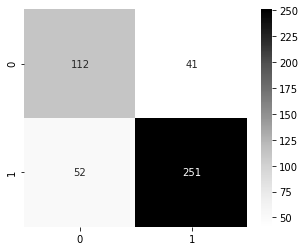

The classification report:
              precision    recall  f1-score   support

           0       0.68      0.73      0.71       153
           1       0.86      0.83      0.84       303

    accuracy                           0.80       456
   macro avg       0.77      0.78      0.78       456
weighted avg       0.80      0.80      0.80       456



In [185]:
# Confussion matrix and report for ADA boost on test data
print('Bagging Model (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_bag)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_bag))
# Obtaining the test metrics into variables
bag_metrics=classification_report(y_test, ytest_predict_bag, output_dict=True)
df=pd.DataFrame(bag_metrics).transpose()
bag_test_f1=round(df.loc["1"][2],2)
bag_test_recall=round(df.loc["1"][1],2)
bag_test_precision=round(df.loc["1"][0],2)
bag_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 1.000
AUC (Test): 0.850


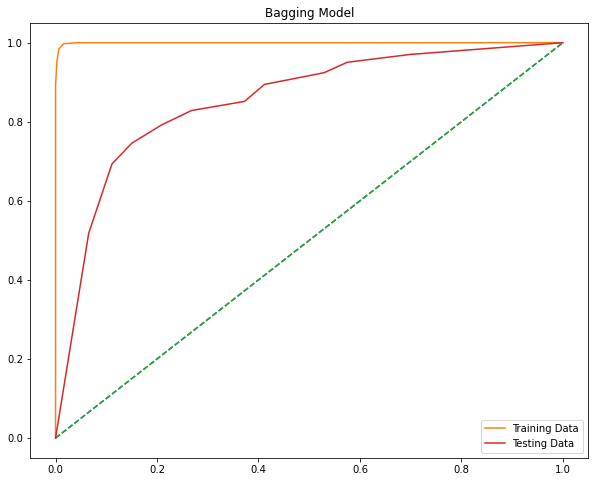

In [186]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = bag.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_train_auc = round(roc_auc_score(y_train_res, probs),2)
print('AUC (Train): %.3f' % bag_train_auc)
# calculate roc curve
bag_train_fpr, bag_train_tpr, bag_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_train_fpr, bag_train_tpr, label='Training Data')
plt.title('Bagging Model')

# For test data
probs = bag.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % bag_test_auc)
# calculate roc curve
bag_test_fpr, bag_test_tpr, bag_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_test_fpr, bag_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

**Random Forest with grid search**

In [187]:
# Creating an instance of the model
rf = RandomForestClassifier(random_state=1)

In [188]:
# Initializing the different hyper parameters
param_grid_rf = {
    'max_features': [4, 5, 6],
    'min_samples_leaf': [2, 10],
    'min_samples_split': [5, 12, 25],
    'n_estimators': [50, 100, 200]
}

In [189]:
# Fitting the train data
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 3)

In [190]:
# Fitting the train data into the grid search
grid_search_rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_features': [4, 5, 6], 'min_samples_leaf': [2, 10],
                         'min_samples_split': [5, 12, 25],
                         'n_estimators': [50, 100, 200]})

In [191]:
# Obtaining the best hyper parameters
print(grid_search_rf.best_params_)

{'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 12, 'n_estimators': 100}


In [192]:
# Obtaining the best classifier
rf_tune = grid_search_rf.best_estimator_

In [193]:
# Prediction on the training set
ytrain_predict_rf_tune = rf_tune.predict(X_train_res)

# Prediction on the testing set
ytest_predict_rf_tune = rf_tune.predict(X_test)

Random Forest Model (Train Data):
Confusion Matrix:


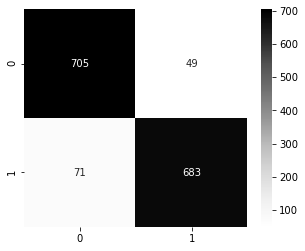

The classification report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       754
           1       0.93      0.91      0.92       754

    accuracy                           0.92      1508
   macro avg       0.92      0.92      0.92      1508
weighted avg       0.92      0.92      0.92      1508



In [194]:
# Confussion matrix and report for ADA Boost on train data
print('Random Forest Model (Train Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_train_res, ytrain_predict_rf_tune)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_train_res, ytrain_predict_rf_tune))
# Obtaining the train metrics into variables
rf_tune_metrics=classification_report(y_train_res, ytrain_predict_rf_tune, output_dict=True)
df=pd.DataFrame(rf_tune_metrics).transpose()
rf_tune_train_f1=round(df.loc["1"][2],2)
rf_tune_train_recall=round(df.loc["1"][1],2)
rf_tune_train_precision=round(df.loc["1"][0],2)
rf_tune_train_acc=round(df.loc["accuracy"][2],2)

Random Forest Model (Test Data):
Confusion Matrix:


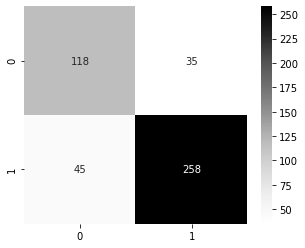

The classification report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75       153
           1       0.88      0.85      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.81      0.81       456
weighted avg       0.83      0.82      0.83       456



In [195]:
# Confussion matrix and report for ADA boost on test data
print('Random Forest Model (Test Data):')
print('Confusion Matrix:')
plt.figure(figsize=(5,4))
sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict_rf_tune)), annot=True, cmap='Greys', fmt='0.4g')
plt.show()
print('The classification report:')
print(metrics.classification_report(y_test, ytest_predict_rf_tune))
# Obtaining the test metrics into variables
rf_tune_metrics=classification_report(y_test, ytest_predict_rf_tune, output_dict=True)
df=pd.DataFrame(rf_tune_metrics).transpose()
rf_tune_test_f1=round(df.loc["1"][2],2)
rf_tune_test_recall=round(df.loc["1"][1],2)
rf_tune_test_precision=round(df.loc["1"][0],2)
rf_tune_test_acc=round(df.loc["accuracy"][2],2)

AUC (Train): 0.980
AUC (Test): 0.890


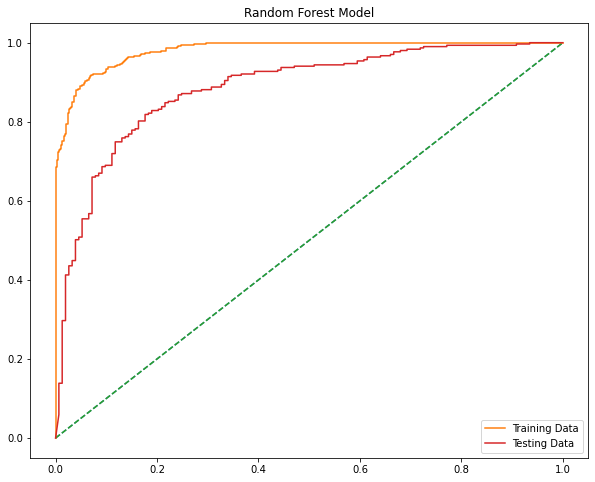

In [196]:
# ROC and AUC
plt.figure(figsize=(10,8))

# For train data
probs = rf_tune.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_tune_train_auc = round(roc_auc_score(y_train_res, probs),2)
print('AUC (Train): %.3f' % rf_tune_train_auc)
# calculate roc curve
rf_tune_train_fpr, rf_tune_train_tpr, rf_tune_train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_tune_train_fpr, rf_tune_train_tpr, label='Training Data')
plt.title('Random Forest Model')

# For test data
probs = rf_tune.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_tune_test_auc = round(roc_auc_score(y_test, probs),2)
print('AUC (Test): %.3f' % rf_tune_test_auc)
# calculate roc curve
rf_tune_test_fpr, rf_tune_test_tpr, rf_tune_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_tune_test_fpr, rf_tune_test_tpr, label='Testing Data')
plt.legend(loc='best')
plt.show()

In [197]:
print('\n\n\033[1mBagging (All parameters in %)\033[0m')
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Bagging (Train)':[bag_train_acc,bag_train_auc,bag_train_recall,bag_train_precision,bag_train_f1],
                     'Random Forest_Tune (Train)':[rf_tune_train_acc,rf_tune_train_auc,rf_tune_train_recall,rf_tune_train_precision,rf_tune_train_f1],
                    'Bagging (Test)':[bag_test_acc,bag_test_auc,bag_test_recall,bag_test_precision,bag_test_f1],
                    'Random Forest_Tune (Test)':[rf_tune_test_acc,rf_tune_test_auc,rf_tune_test_recall,rf_tune_test_precision,rf_tune_test_f1]},index=index)
bagging_performance = round(data,2)*100
bagging_performance.T



Bagging (All parameters in %)


,Accuracy,AUC,Recall,Precision,F1 Score
Bagging (Train),99.0,100.0,98.0,99.0,99.0
Random Forest_Tune (Train),92.0,98.0,91.0,93.0,92.0
Bagging (Test),80.0,85.0,83.0,86.0,84.0
Random Forest_Tune (Test),82.0,89.0,85.0,88.0,87.0


In [198]:
# We will consolidate all the model metrics
consolidate_models = pd.concat([logit_performance, lda_performance, knn_performance, nb_performance, boost_performance, bagging_performance], axis=1)
consolidate_models

,Logistic Regression (Train),Logistic Regression_Tune (Train),Logistic Regression (Test),Logistic Regression_Tune (Test),LDA (Train),LDA [Thresh>0.4] (Train),LDA (Test),LDA [Thresh>0.4] (Test),KNN (Test),Naive Bayes (Train),Naive Bayes (Test),ADA Boost (Train),Gradient Boost (Train),ADA Boost (Test),Gradient Boost (Test),Bagging (Train),Random Forest_Tune (Train),Bagging (Test),Random Forest_Tune (Test)
Accuracy,84.0,84.0,80.0,81.0,84.0,84.0,81.0,81.0,70.0,84.0,80.0,84.0,98.0,80.0,81.0,99.0,92.0,80.0,82.0
AUC,91.0,91.0,87.0,88.0,91.0,91.0,87.0,87.0,87.0,91.0,86.0,94.0,100.0,86.0,88.0,100.0,98.0,85.0,89.0
Recall,83.0,83.0,80.0,81.0,83.0,83.0,80.0,80.0,93.0,83.0,81.0,83.0,98.0,84.0,84.0,98.0,91.0,83.0,85.0
Precision,84.0,84.0,89.0,90.0,85.0,85.0,90.0,90.0,70.0,84.0,88.0,85.0,99.0,86.0,87.0,99.0,93.0,86.0,88.0
F1 Score,84.0,83.0,84.0,85.0,84.0,84.0,85.0,85.0,80.0,84.0,84.0,84.0,98.0,85.0,85.0,99.0,92.0,84.0,87.0


In [199]:
# For ease of analysing the metrics let us split the test and train into separate data frames
consolidate_models_train = consolidate_models[['Logistic Regression (Train)', 'Logistic Regression_Tune (Train)', 'LDA (Train)', 'LDA [Thresh>0.4] (Train)', 'Naive Bayes (Train)', 'ADA Boost (Train)', 'Gradient Boost (Train)', 'Bagging (Train)', 'Random Forest_Tune (Train)']]
consolidate_models_train.style.highlight_max(color = 'lightgreen', axis = 1)

,Logistic Regression (Train),Logistic Regression_Tune (Train),LDA (Train),LDA [Thresh>0.4] (Train),Naive Bayes (Train),ADA Boost (Train),Gradient Boost (Train),Bagging (Train),Random Forest_Tune (Train)
Accuracy,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,98.000000,99.000000,92.000000
AUC,91.000000,91.000000,91.000000,91.000000,91.000000,94.000000,100.000000,100.000000,98.000000
Recall,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,98.000000,98.000000,91.000000
Precision,84.000000,84.000000,85.000000,85.000000,84.000000,85.000000,99.000000,99.000000,93.000000
F1 Score,84.000000,83.000000,84.000000,84.000000,84.000000,84.000000,98.000000,99.000000,92.000000


In [200]:
consolidate_models_train = consolidate_models[['Logistic Regression (Test)', 'Logistic Regression_Tune (Test)', 'LDA (Test)', 'LDA [Thresh>0.4] (Test)', 'KNN (Test)', 'Naive Bayes (Test)', 'ADA Boost (Test)', 'Gradient Boost (Test)', 'Bagging (Test)', 'Random Forest_Tune (Test)']]
consolidate_models_train.style.highlight_max(color = 'lightgreen', axis = 1)

,Logistic Regression (Test),Logistic Regression_Tune (Test),LDA (Test),LDA [Thresh>0.4] (Test),KNN (Test),Naive Bayes (Test),ADA Boost (Test),Gradient Boost (Test),Bagging (Test),Random Forest_Tune (Test)
Accuracy,80.000000,81.000000,81.000000,81.000000,70.000000,80.000000,80.000000,81.000000,80.000000,82.000000
AUC,87.000000,88.000000,87.000000,87.000000,87.000000,86.000000,86.000000,88.000000,85.000000,89.000000
Recall,80.000000,81.000000,80.000000,80.000000,93.000000,81.000000,84.000000,84.000000,83.000000,85.000000
Precision,89.000000,90.000000,90.000000,90.000000,70.000000,88.000000,86.000000,87.000000,86.000000,88.000000
F1 Score,84.000000,85.000000,85.000000,85.000000,80.000000,84.000000,85.000000,85.000000,84.000000,87.000000


-----
## Conlcusion

Summary:
We will hence proceed with the logistic regression model for production.

Technical Details of the model:
-	Logistic Regression model is the model that performs the best.
-	The train data was balanced using SMOTE
-	Only Gender and vote was encoded using dummy variables all others were retained as it is assuming that the order of rating had a meaning.
-	The hyper parameters for logistic regression model are:
{'max_iter': 25, 'penalty': 'l2', 'solver': 'sag', 'tol': 1e-05}
-	hague (negatively) and blair (positively) are major contributors to the prediction followed by economic_cond_houseold (positively) and gender (positively)
-	Even post class imbalance is addressed the labour class has lower accuracy. This can be further supported by the inference drawn from the multivariate analysis, which proves that the voters who rated labour party are very clear in voting for labour where as the voters who rated conservative party high still had a large chunk of voters voting for labour party. This shows that the labour party is not very clear in its objectives or is a very volatile party and so people are sceptic.


## --------------------------------------------------------------------------------------------------------------